# Importing Libraries
***
### Analyst: Jerwin Nico H. Quijano

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

## Using i think nessisarry Column to save Ram
***

In [2]:
use_cols = [
    "Date", "Primary Type", "Description", "Location Description",
    "Arrest", "Domestic", "District", "Ward", 
    "Community Area", "FBI Code", "Latitude", "Longitude", 
    "Year"
]
data = pd.read_csv('datasets//chicago_2001_present.csv', usecols=use_cols, low_memory=False)

In [3]:
data.head(10)

Date                Primary Type  \
0  07/29/2022 03:39:00 AM  OFFENSE INVOLVING CHILDREN   
1  01/03/2023 04:44:00 PM                   NARCOTICS   
2  08/10/2020 09:45:00 AM                     ROBBERY   
3  08/26/2017 10:00:00 AM         CRIM SEXUAL ASSAULT   
4  09/06/2023 05:00:00 PM             CRIMINAL DAMAGE   
5  09/06/2023 11:00:00 AM                       THEFT   
6  05/21/2019 08:20:00 AM                    BURGLARY   
7  07/07/2021 10:30:00 AM                 SEX OFFENSE   
8  06/14/2022 02:47:00 PM                     ROBBERY   
9  09/21/2022 10:00:00 PM         MOTOR VEHICLE THEFT   

                      Description                    Location Description  \
0               CHILD PORNOGRAPHY                               RESIDENCE   
1   MANUFACTURE / DELIVER - CRACK                                SIDEWALK   
2  AGGRAVATED VEHICULAR HIJACKING                                  STREET   
3                  NON-AGGRAVATED                             HOTEL/MOTEL   
4                      TO VEHICLE  PARKING LOT / GARAGE (NON RESIDENTIAL)   
5                       OVER $500  PARKING LOT / GARAGE (NON RESIDENTIAL)   
6                  UNLAWFUL ENTRY                               RESIDENCE   
7  SEXUAL EXPLOITATION OF A CHILD                               RESIDENCE   
8  ATTEMPT STRONG ARM - NO WEAPON                                    BANK   
9                      AUTOMOBILE                         OTHER (SPECIFY)   

   Arrest  Domestic  District  Ward  Community Area FBI Code  Year   Latitude  \
0    True     False      10.0  25.0            30.0       17  2022        NaN   
1    True     False      11.0  28.0            26.0       18  2023        NaN   
2    True     False      14.0   1.0            24.0       03  2020  41.908418   
3   False     False       1.0  42.0            32.0       02  2017        NaN   
4   False     False       1.0  42.0            32.0       14  2023  41.886018   
5   False     False       1.0   4.0            32.0       06  2023  41.871835   
6   False     False      10.0  25.0            29.0       05  2019  41.856547   
7   False     False       5.0  10.0            54.0       17  2021  41.655116   
8    True     False      16.0  30.0            15.0       03  2022  41.945232   
9    True     False       3.0   6.0            69.0       07  2022  41.769347   

   Longitude  
0        NaN  
1        NaN  
2 -87.677407  
3        NaN  
4 -87.633938  
5 -87.626151  
6 -87.695605  
7 -87.594883  
8 -87.766735  
9 -87.615008

In [4]:
data['Date'] = data['Date'].astype('str')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors = 'coerce')

In [5]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['HourOfDay'] = data['Date'].dt.hour
data['MinuteOfDay'] = data["Date"].dt.minute

## Converting Data Types to their appropriate data types.
***

In [6]:
data['Location Description'] = data['Location Description'].fillna('unaccounted')
data['District'] = data['District'].fillna(data['District'].mean())
data['Ward'] = data['Ward'].fillna(-1) # -1 represent as unknown ward
data['Community Area'] = data['Community Area'].fillna(-1) # -1 represent as unknown community area
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())

In [7]:
data['Description'] = data['Description'].astype('category')
data['Location Description'] = data['Location Description'].astype('str')
data['Community Area'] = data['Community Area'].astype('float64')
data['FBI Code'] = data['FBI Code'].astype('category')
data['Year'] = data['Year'].astype('int16')
data['Month'] = data['Month'].astype('int16')
data['Day'] = data['Day'].astype('int8')
data['DayOfWeek'] = data['DayOfWeek'].astype('int8')
data['HourOfDay'] = data['HourOfDay'].astype('int8')
data['MinuteOfDay'] = data['MinuteOfDay'].astype('int8')

In [8]:
data.dtypes

Date                    datetime64[ns]
Primary Type                    object
Description                   category
Location Description            object
Arrest                            bool
Domestic                          bool
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                      category
Year                             int16
Latitude                       float64
Longitude                      float64
Month                            int16
Day                               int8
DayOfWeek                         int8
HourOfDay                         int8
MinuteOfDay                       int8
dtype: object

# Cleaning Data add Adding appropriate values and normalizing data.
___

In [9]:
data['Community Area'].unique()

array([30., 26., 24., 32., 29., 54., 15., 69., 43., 68., 63., 65., 37.,
       58., 44., 22., 49., 53., 11., 45., 23., 71., 19., 46., 27., 50.,
       38., 66., 25., 40., 21., 14., 52., 10.,  3., 17., 56., 48., 16.,
       77., 18., 73., 61., 31., 35., 33., 39.,  1., 20.,  9., 51., 28.,
        4., 70., 57., 75., 42., 55., 67.,  2., 76.,  8., 34.,  5.,  6.,
       74., 60.,  7., 13., 36., 12., 72., 62., 41., 47., 59., 64., -1.,
        0.])

In [10]:
data.isnull().sum()

Date                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
Month                   0
Day                     0
DayOfWeek               0
HourOfDay               0
MinuteOfDay             0
dtype: int64

### Adding Community Name
***

In [11]:
community_map = {
    1: "Rogers Park",
    2: "West Ridge",
    3: "Uptown",
    4: "Lincoln Square",
    5: "North Center",
    6: "Lake View",
    7: "Lincoln Park",
    8: "Near North Side",
    9: "Edison Park",
    10: "Norwood Park",
    11: "Jefferson Park",
    12: "Forest Glen",
    13: "North Park",
    14: "Albany Park",
    15: "Portage Park",
    16: "Irving Park",
    17: "Dunning",
    18: "Montclare",
    19: "Belmont Cragin",
    20: "Hermosa",
    21: "Avondale",
    22: "Logan Square",
    23: "Humboldt Park",
    24: "West Town",
    25: "Austin",
    26: "West Garfield Park",
    27: "East Garfield Park",
    28: "Near West Side",
    29: "North Lawndale",
    30: "South Lawndale",
    31: "Lower West Side",
    32: "Loop",
    33: "Near South Side",
    34: "Armour Square",
    35: "Douglas",
    36: "Oakland",
    37: "Fuller Park",
    38: "Grand Boulevard",
    39: "Kenwood",
    40: "Washington Park",
    41: "Hyde Park",
    42: "Woodlawn",
    43: "South Shore",
    44: "Chatham",
    45: "Avalon Park",
    46: "South Chicago",
    47: "Burnside",
    48: "Calumet Heights",
    49: "Roseland",
    50: "Pullman",
    51: "South Deering",
    52: "East Side",
    53: "West Pullman",
    54: "Riverdale",
    55: "Hegewisch",
    56: "Garfield Ridge",
    57: "Archer Heights",
    58: "Brighton Park",
    59: "McKinley Park",
    60: "Bridgeport",
    61: "New City",
    62: "West Elsdon",
    63: "Gage Park",
    64: "Clearing",
    65: "West Lawn",
    66: "Chicago Lawn",
    67: "West Englewood",
    68: "Englewood",
    69: "Greater Grand Crossing",
    70: "Ashburn",
    71: "Auburn Gresham",
    72: "Beverly",
    73: "Washington Heights",
    74: "Mount Greenwood",
    75: "Morgan Park",
    76: "O'Hare",
    77: "Edgewater",
    -1: "Unknown"
}

data['community_name'] = data['Community Area'].map(community_map)

### Adding Ward Names
***

In [12]:
ward_names = {
    1: "Daniel La Spata",
    2: "Brian Hopkins",
    3: "Pat Dowell",
    4: "Lamont J. Robinson",
    5: "Desmon C. Yancy",
    6: "William E. Hall",
    7: "Gregory Mitchell",
    8: "Michelle Harris",
    9: "Anthony Beale",
    10: "Peter Chico",
    11: "Nicole T. Lee",
    12: "Julia M. Ramirez",
    13: "Marty Quinn",
    14: "Jeylu B. Gutierrez",
    15: "Raymond Lopez",
    16: "Stephanie D. Coleman",
    17: "David Moore",
    18: "Derrick G. Curtis",
    19: "Matthew J. O’Shea",
    20: "Jeanette B. Taylor",
    21: "Ronnie L. Mosley",
    22: "Michael D. Rodriguez",
    23: "Silvana Tabares",
    24: "Monique L. Scott",
    25: "Byron Sigcho Lopez",
    26: "Jessica Fuentes",
    27: "Walter Redmond Burnett",
    28: "Jason C. Ervin",
    29: "Chris Taliaferro",
    30: "Ruth Cruz",
    31: "Felix Cardona, Jr.",
    32: "Scott Waguespack",
    33: "Rossana Rodriguez Sanchez",
    34: "William Conway",
    35: "Anthony Quezada",
    36: "Gilbert Villegas",
    37: "Emma Mitts",
    38: "Nicholas Sposato",
    39: "Samantha Nugent",
    40: "Andre Vasquez, Jr.",
    41: "Anthony Napolitano",
    42: "Brendan Reilly",
    43: "Timmy Knudsen",
    44: "Bennett R. Lawson",
    45: "James M. Gardiner",
    46: "Angela Clay",
    47: "Matthew J. Martin",
    48: "Leni Manaa-Hoppenworth",
    49: "Maria E. Hadden",
    50: "Debra Silverstein",
    -1: "Unknown"
}

data['ward_rep'] = data['Ward'].map(ward_names)

# Descriptive analysis
***
1. Which ward during their term has recorded the highest overall crime in Grand Boulevard?
2. Which District Area has the most recorded crime?
3. What Type of Crime often commit in the community area with most Poverty ('Riverdale')?
4. What is the Top 5 safest Neigborhood to live in Chichago with least Crime committed?
5. What Type of crime is commited in the saftes neighborhood in Chichago?
6. What is the hotspot of Theft in the safest neighborhood in chicago
7. Are sex-related crimes increasing again in recent years after a decade of decline?
8. Is there a strong relationship between time (year) and the decline of sex-related crimes in Chicago?
9. What crime has the highest arrest rate?
10. What time and Day of the Week does theft Do their crime?
11. Which is higher? Comparing the Old year from 2001 - 2006 crime to 2019 to 2025.
12. What is the top 10 most Committed Crime in Chichago?
13. Which community area in chichago does Narcotics/Drugs often comitted?
14. What type of crime is often committed in Englewood?
15. Crime trend Over the year in Englewood Community?
16. Which ward in englewood has the highest crime during their term?
17. Does crime increase over the year depends on whose ward is in charge?
18. Which day of the week has the highest crime in englewood?
19. Does crime in Englewood follow a pattern depending on the day of the week?
20. What type of Crime is Often Committed in the Business District in Chicago?
21. Does the leadership style of each alderman in Loop affect their ward crime rate?
22. Which areas in the Loop experience the highest number of theft incidents?
23. On which days of the week do thefts occur most frequently in the Loop?
24. Which areas in the Loop are most prone to theft, and why?
25. Does Aldermans politcal management contributes to high crime rate in Loop?
26. Top 10 community with PROSTITUTION is the highest crime.
27. Which types of crime in Chicago are mostly happening between strangers — and which ones are more likely to happen within families or households?
28. Which Chicago communities have the most crime, and what type of crime is most common in each?
29. When are crimes in alleys most likely to occur, and what might help reduce them?
30. Which community areas have the highest proportion of domestic-related crimes?
31. which locations do drug related crime mostly occured?
32. At what time of day are narcotics crimes most likely to occur?
33. Are certain crimes more common during specific months?
34. Do crimes spike during weekends compared to weekdays?
35. Do certain communities experience seasonal crime spikes?

# Grand Boulevard Analysis
***
<img src='https://upload.wikimedia.org/wikipedia/commons/2/20/20070511_Harold_Washington_Cultual_Center.JPG'>

In [82]:
gb_df = data[data['community_name'] == 'Grand Boulevard']

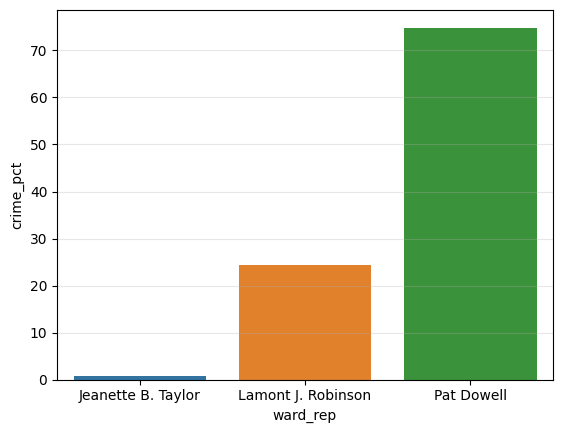

In [83]:
most_crime = gb_df.groupby(['ward_rep']).size().reset_index(name='crime')
most_crime['crime_pct'] = (most_crime['crime'] / most_crime['crime'].sum()) * 100 # display by percentage
plt.grid(axis='y', alpha=0.3)
sns.barplot(data = most_crime, x = 'ward_rep', y = 'crime_pct', hue = 'ward_rep')
plt.show()

## 1.1: Insight
***
So looking the data represented by percent, it is clear that the crime is heavily concentrated in one area which is Pat Dowel Ward for over most atleast 70%  of all reported crime acroos three wards shown, Lamont J. Robinson on the other hand makes about a quarter of What Pat Dowell in total, while Jeanette B. Taylor ward contributes to almost nothing with a least of 1%. This jus suggest that Pat Dowells Ward should be the priority cause that where all the i think majority problems lies. 

In [84]:
area_no_uknown = data[data['community_name'] != 'Unknown']

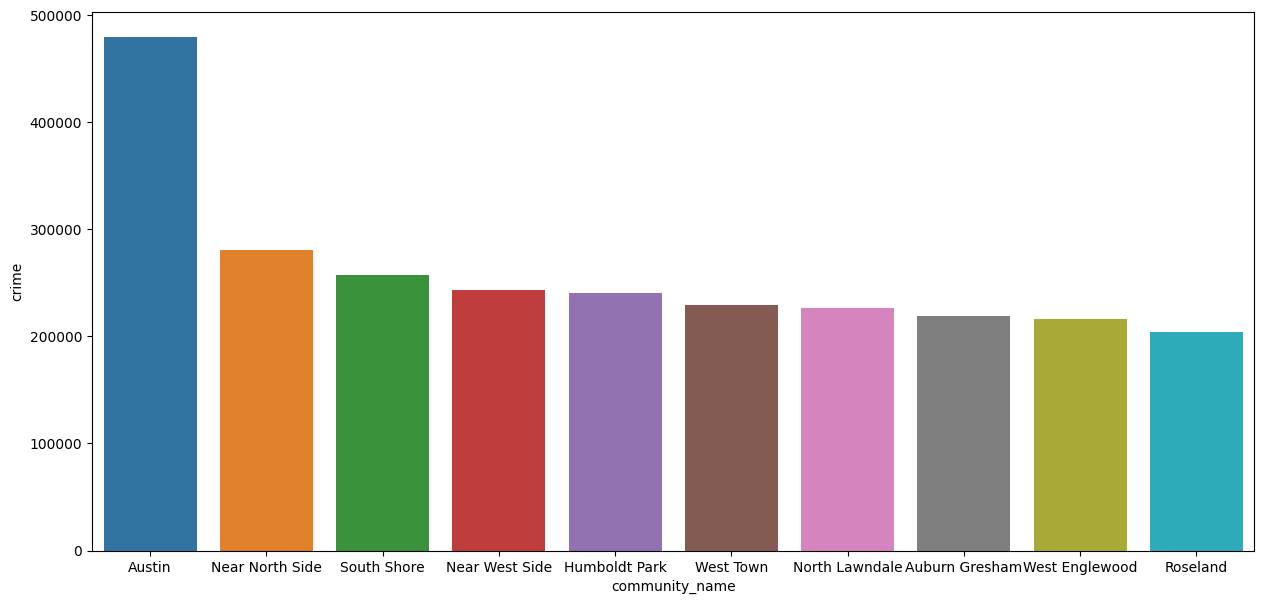

In [85]:
areas_with_high_crime = area_no_uknown.groupby('community_name').size().reset_index(name='crime').nlargest(10, 'crime')
areas_with_high_crime
sns.barplot(data = areas_with_high_crime, x = 'community_name', y = 'crime', hue = 'community_name')
plt.gcf().set_size_inches(15,7)
plt.show()

## 1.2: Insight
***
Austin is overwhelmingly the community with the highest recorded number of crime incidents among the top ten, nearing 500,000 and standing as a significant outlier when compared to the others, which suggests that this area is the single most problematic region in terms of raw crime volume in the dataset. The next group of communities, including Near North Side, South Shore, and others down to North Lawndale, form a second tier with substantially lower yet high crime counts, mostly concentrated between approximately 225,000 and 300,000 incidents. The final three communities in the top ten—Auburn Gresham, West Englewood, and Roseland—all register counts just above 200,000, demonstrating that while the total crime counts are high across the list, there is a pronounced and notable difference between the top-ranked area and the rest of the high-crime communities.

## River Dale Chichago Poverty Community
<img src ='https://media.istockphoto.com/id/185325242/photo/small-midwest-town-riverdale-chicago.jpg?s=1024x1024&w=is&k=20&c=D3Wl60yt1G5jnr115Z-EaJ2f0xwi7_7X3aDJL3rkeno='>

In [86]:
riverdale_df = data[data['community_name'] == 'Riverdale']

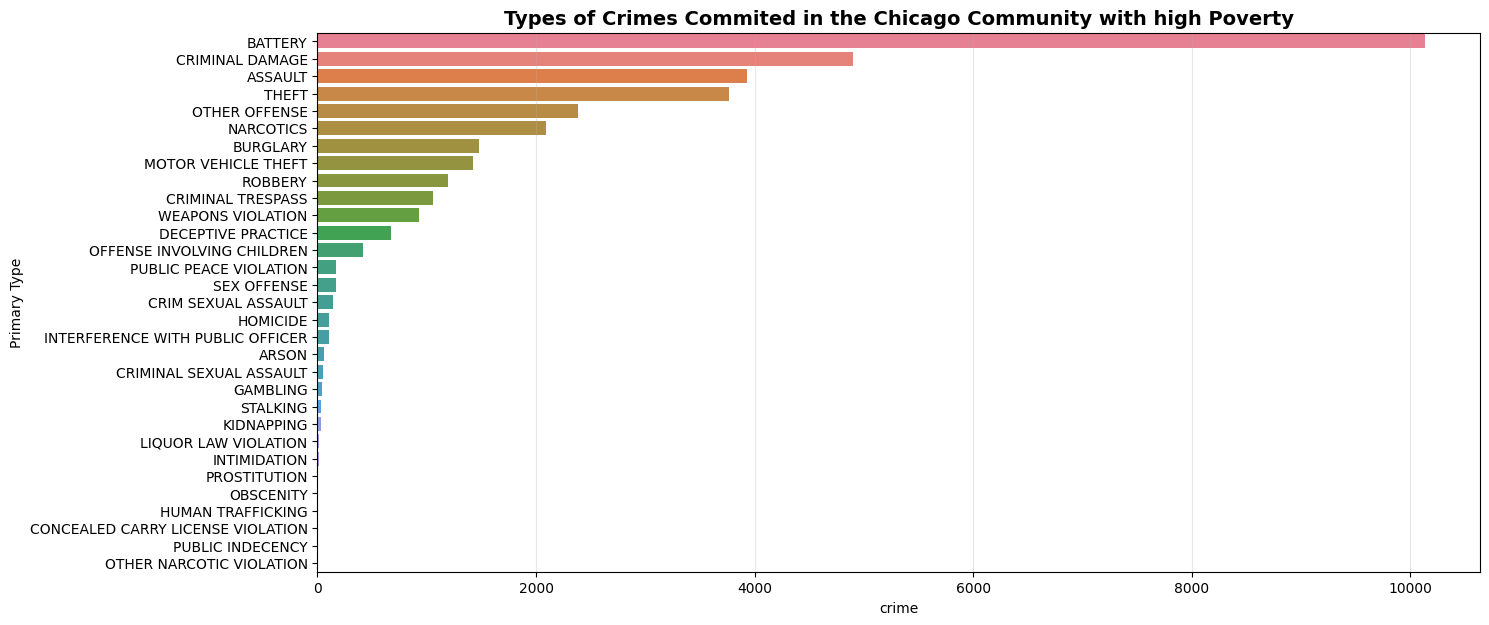

In [87]:
riverdale_crime_type = riverdale_df['Primary Type'].value_counts().reset_index(name="crime")
riverdale_crime_type
sns.barplot(data = riverdale_crime_type, y = 'Primary Type', x = 'crime', orient = 'h', hue = 'Primary Type')
plt.title("Types of Crimes Commited in the Chicago Community with high Poverty", fontsize=14, weight="bold")
plt.gcf().set_size_inches(15,7)
plt.grid(axis='x', alpha=0.3)
plt.show()

## 2: Insight
***
If you look at the chart, Riverdale’s crime problem is mostly about people hurting people. Battery is crazy high compared to everything else — meaning fights, violence, and physical attacks are the everyday issue there. Right after that, you see a lot of Criminal Damage (like breaking stuff, vandalism) and Assault. Theft and drug cases also show up a lot, which makes sense since money is tight and people sometimes turn to quick cash or drugs.

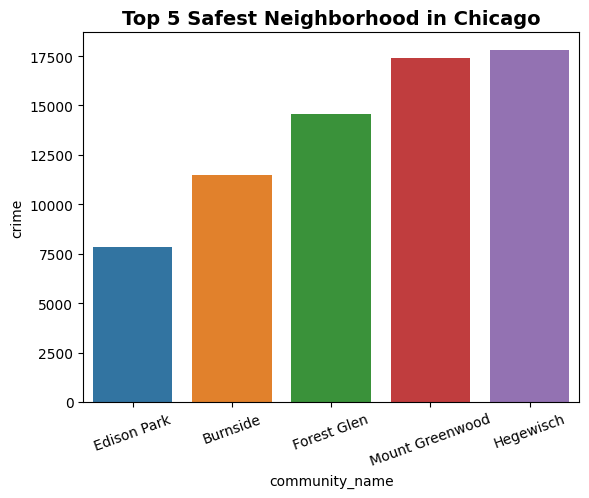

In [88]:
top_5_safest = data.groupby('community_name').size().reset_index(name = 'crime').nsmallest(5, 'crime')
plt.title("Top 5 Safest Neighborhood in Chicago", fontsize=14, weight="bold")
sns.barplot(data = top_5_safest, x = 'community_name', y = 'crime', hue = 'community_name')
plt.xticks(rotation = 20)
plt.show()

## 3: Insight
***
If you’re looking for a safe neighborhood in Chicago, the data says: Edison Park is the safest place to live — way fewer crimes than anywhere else. After that, Burnside, Forest Glen, Mount Greenwood, and Hegewisch follow, but they still have more cases than Edison Park. Basically, if safety is your main concern, these five neighborhoods are your best bets, with Edison Park being the clear winner.

In [89]:
edison_df = data[data['community_name'] == 'Edison Park']

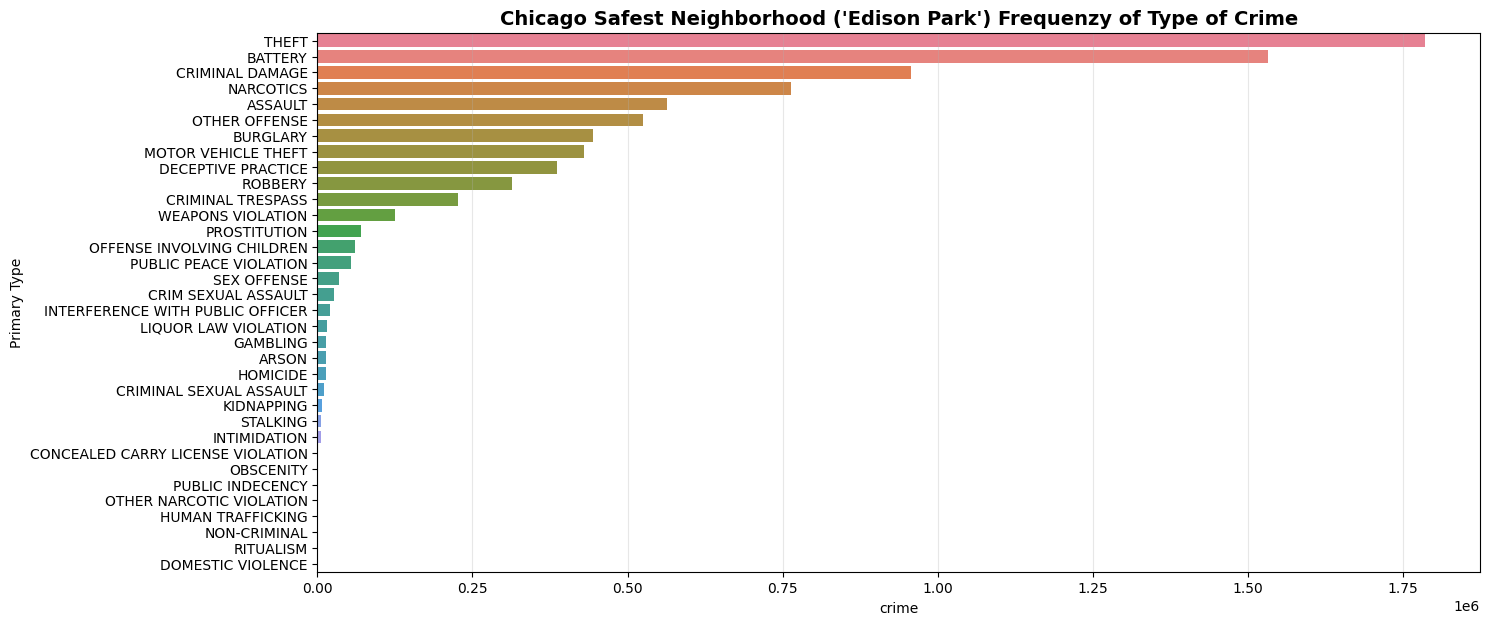

In [90]:
edison_crimes = data['Primary Type'].value_counts().reset_index(name='crime')
sns.barplot(data = edison_crimes, y = 'Primary Type', x = 'crime', orient = 'h', hue = 'Primary Type')
plt.gcf().set_size_inches(15,7)
plt.title("Chicago Safest Neighborhood ('Edison Park') Frequenzy of Type of Crime", fontsize=14, weight="bold")
plt.grid(axis='x', alpha=0.3)
plt.show()

## 4: Insight
***
I was suprise that the most safest neighborhood still has crime. Theft is the number one leading crime committed, So while Edisone park doesn't have crazy levels of violence like in riverdale, people here still deal with their stuff getting stolen or property getting damage. So basically, the danger here is not about getting kicked in the ass but more on the side of keeping your property and belongings safe.

In [91]:
theft_df = edison_df[edison_df['Primary Type'] == 'THEFT']

edisone_locations = list(zip(theft_df['Latitude'], theft_df['Longitude']))

edisonMap = folium.Map(locations = [theft_df['Latitude'].mean(), theft_df['Longitude'].mean()], zoom_start=10)
HeatMap(edisone_locations).add_to(edisonMap)
edisonMap.save('edison_park_map.html')
edisonMap

## 5: Insight
***
Looking at the heatmap, it’s clear that theft usually goes down on the streets, especially around North Olmstead Ave and North Avondale Ave. That kinda hints these aren’t house break-ins but more like street robberies or quick grabs where there’s traffic and people around. Basically, the action isn’t happening inside homes — it’s out in the open.

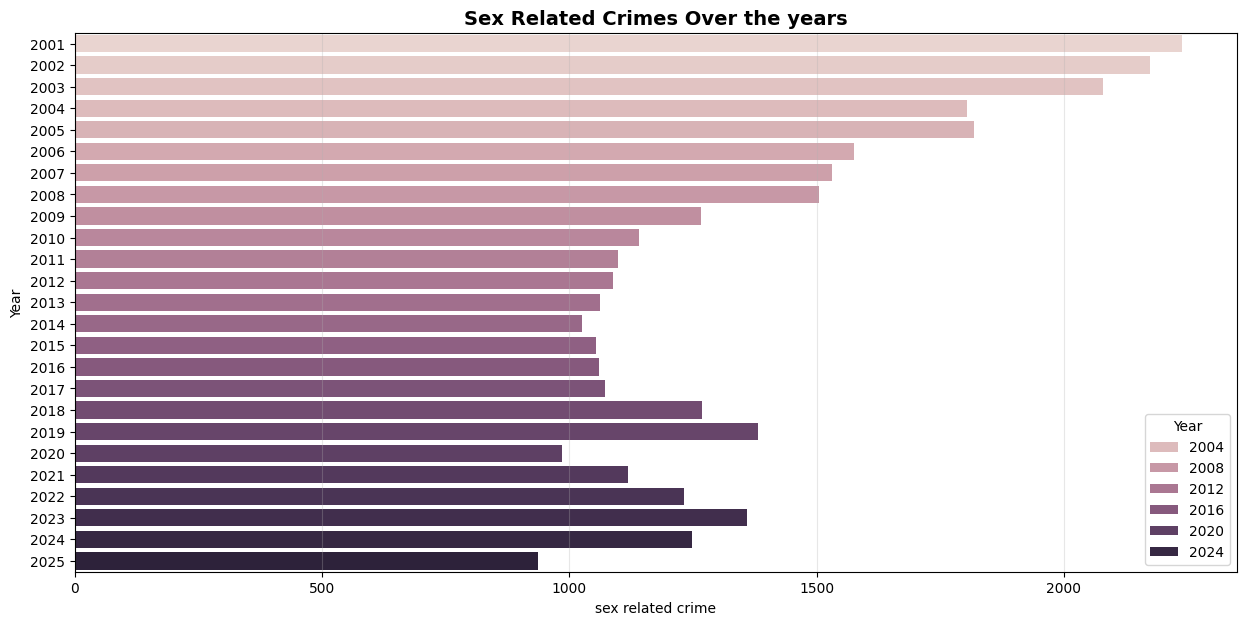

In [92]:
sex_offense_df = data[data['Primary Type'] == 'SEX OFFENSE']
sex_crime_years = sex_offense_df.groupby(['Year']).size().reset_index(name='sex related crime')
sns.barplot(data = sex_crime_years, y = 'Year', x = 'sex related crime', orient = 'h', hue = 'Year')
plt.gcf().set_size_inches(15,7)
plt.title("Sex Related Crimes Over the years", fontsize=14, weight="bold")
plt.grid(axis='x', alpha=0.3)
plt.show()

## 6: Insight
***
Sex-related crimes were way higher back in the early 2000s (2000–2003), then they dropped pretty steadily through the 2010s. Around 2018, though, the numbers started climbing back up, with 2019 and 2023 being the highest spikes in recent years. 2020 looks super low, but that’s likely because of COVID lockdowns — less movement and maybe less reporting. The big picture? We’ve made progress since the early 2000s, but these crimes are creeping up again lately, so it’s still a serious issue.

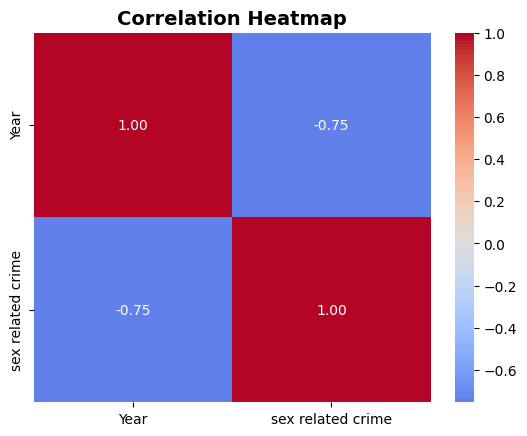

In [93]:
sex_crime_years = sex_offense_df.groupby(['Year']).size().reset_index(name='sex related crime')
correlation_matrix = sex_crime_years.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14, weight="bold")
plt.show()

## 7: Insight
***
So the correlation Map of sex related crimes and year, says that Sex related crimes chicago have strongly decreased as the years goes by. So basically no relation, what i understand that as they not relate as the years goes by..

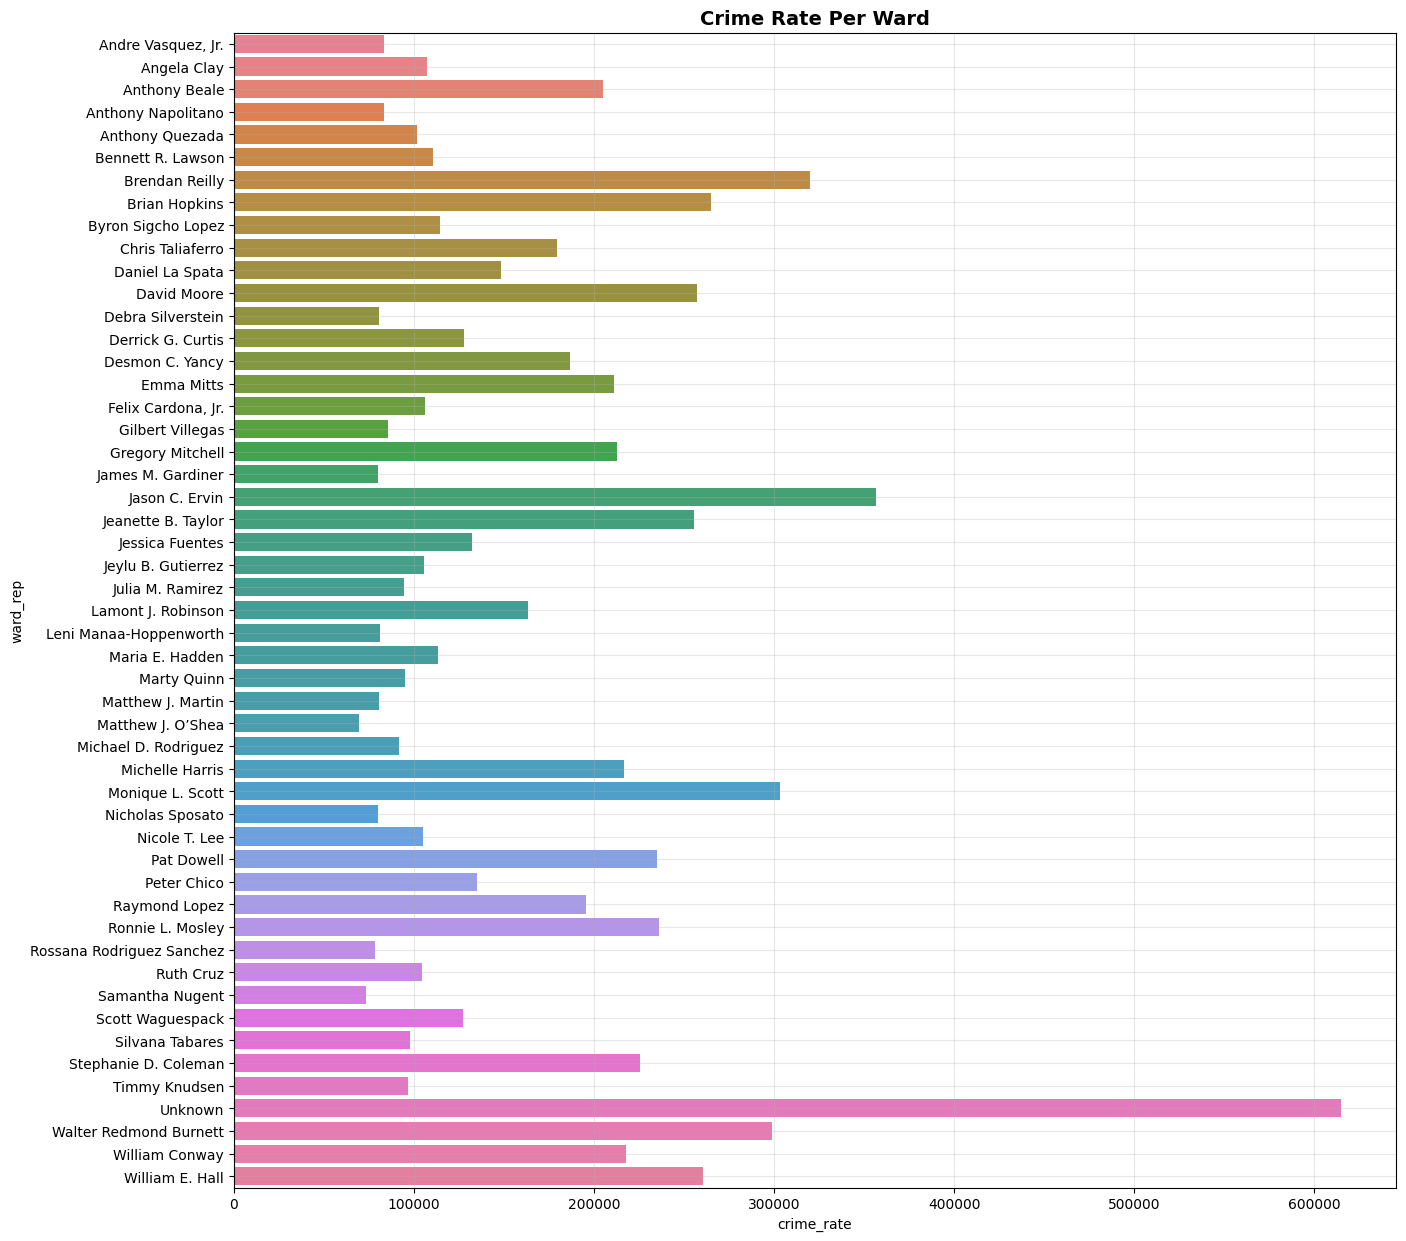

In [95]:
crime_per_ward = data.groupby('ward_rep').size().reset_index(name = 'crime_rate')
sns.barplot(data = crime_per_ward, y = 'ward_rep', x = 'crime_rate', orient = 'h', hue = 'ward_rep')
plt.gcf().set_size_inches(15,15)
plt.title("Crime Rate Per Ward", fontsize=14, weight="bold")
plt.grid(alpha=0.3)
plt.show()

## 8: Insight
***
Not all wards are equal — some record much higher crime rates than others. This doesn’t just reflect population size or environment, but could also be tied to how well each ward is managed. Factors like how community resources are allocated, how effectively public safety is enforced, and how well local programs are run can all influence crime levels. In short, governance and leadership play a role in whether a ward feels safer or more at risk.

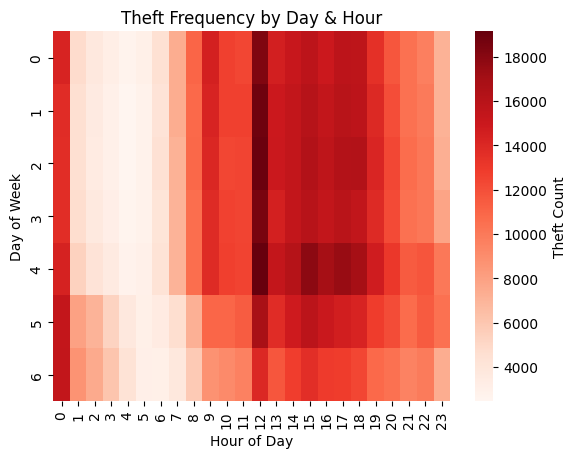

In [96]:
theft_df = data[data['Primary Type'] == 'THEFT']
hour_df = theft_df.groupby(['DayOfWeek', 'HourOfDay']).size()
hour_df = hour_df.unstack(level=0)
sns.heatmap(hour_df.T, cmap="Reds", annot=False, cbar_kws={'label':'Theft Count'})
plt.title("Theft Frequency by Day & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

## 9: Insight
***
Basically, the data shows that most thefts happen during normal business hours—think late morning to late afternoon (around 10 AM to 5 PM)—and it's a lot worse Monday through Friday. If you're looking for the safest time, it's definitely overnight or all day on Sunday, where the number of thefts drops significantly.

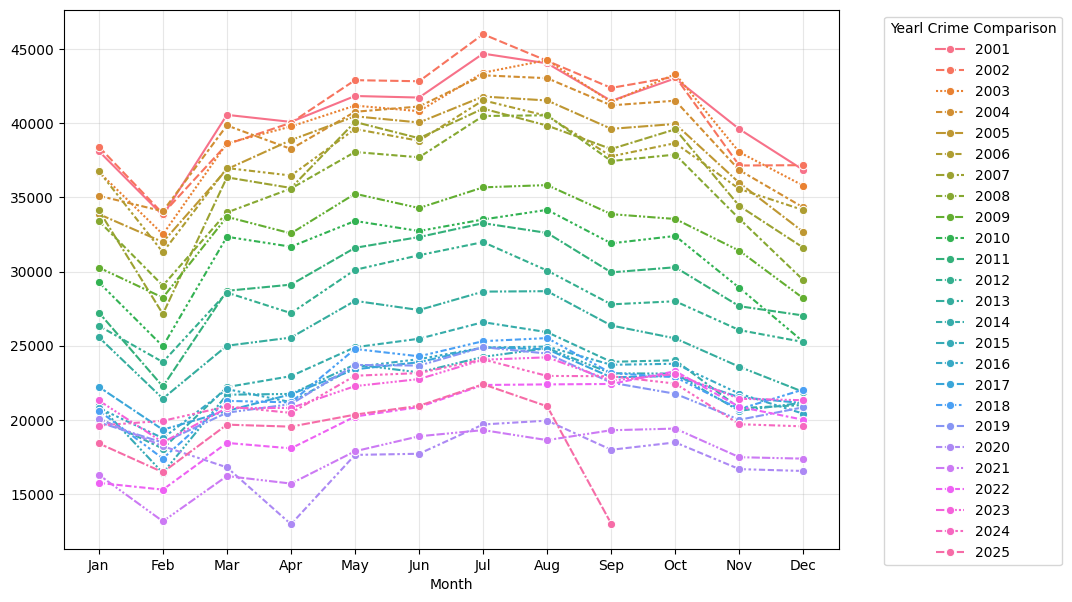

In [98]:
crime_trend = data.groupby(['Year', 'Month']).size().unstack(level=0)
sns.lineplot(crime_trend, marker ='o')
plt.gcf().set_size_inches(10,7)
plt.legend(title='Yearl Crime Comparison' ,bbox_to_anchor = (1.05,1), loc='upper left')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

## 10: Insight
***
From this chart, you can see that crime tends to peak mid-year, mostly around July and August. The early months, like January and February, are usually lower—probably because people are still in holiday mode. Starting around 2020, there’s a noticeable drop in crime, likely due to the pandemic and its stricter regulations or other social changes. Older years, like 2001–2006, show consistently higher numbers, while recent years are much lower. Overall, crime fluctuates throughout the year, hitting a summer peak, but the general trend in recent years is downward.

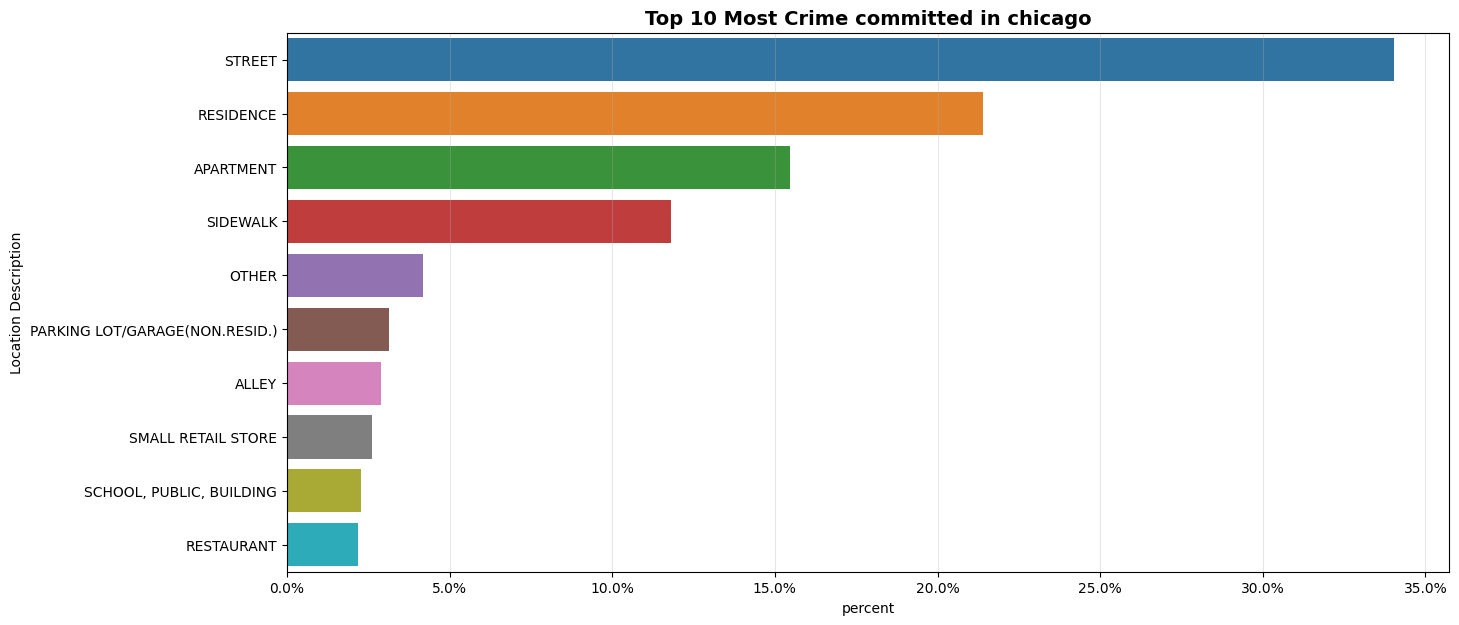

In [100]:
location_desc_data = data.groupby('Location Description').size().reset_index(name = 'crime').nlargest(10, 'crime')
location_desc_data['percent'] = (location_desc_data['crime'] / location_desc_data['crime'].sum()) * 100 # math to get percent
sns.barplot(data = location_desc_data, y = 'Location Description', x = 'percent', orient = 'h', hue = 'Location Description')
plt.gcf().set_size_inches(15,7)
plt.title("Top 10 Most Crime committed in chicago", fontsize=14, weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%')) # format to % for better understanding of numbers
plt.grid(axis='x', alpha=0.3)
plt.show()

## 11: Insight
***
so look, this chart kinda shows that crime in chicago is super concentrated in just a few spots — and the street alone is like, almost 34% of all reported stuff. thats not just “a lot” — its more than 1/3 of all crime happenin out in the open, where ppl walk, drive, or wait for buses. right after? residences at around 20% — which means like 1 in 5 crimes happens inside someones home or right outside their door. apartments are next at like 15%, which makes sense — dense housing = more targets, more ppl, more chances for stuff to happen. then sidewalks at about 11%, and after that it drops fast: “other” places are like 4%, parking lots and alleys around 3–4%, and everything else — schools, restaurants, small stores — barely above 2%. the thing tho? even tho chicago has like hundreds of types of places, just 10 categories make up over 90% of crime — and most of them are spots we go every day. so if u tryna stay safe? maybe watch out more when ur walking down the street, comin home late, or parking ur car — cos thats where most of the crime actually goes down.

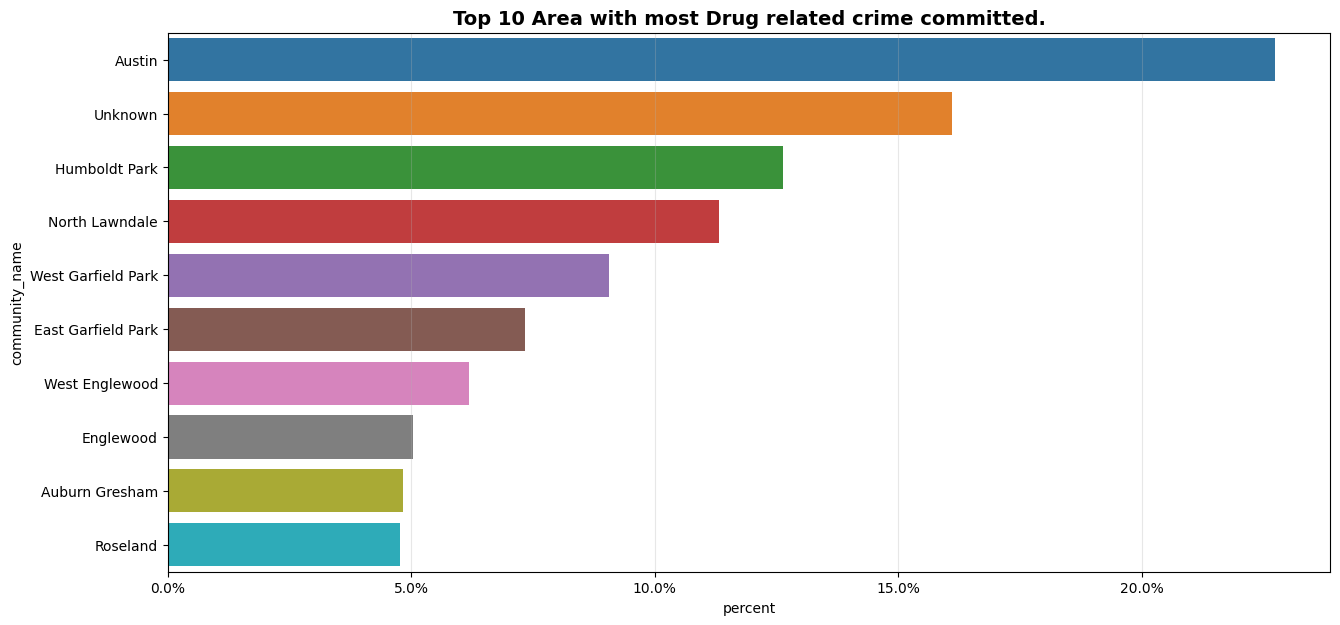

In [101]:
narcotics_df = data[data['Primary Type'] == 'NARCOTICS']
top_narcotics_area = narcotics_df.groupby('community_name').size().reset_index(name='narcotics_crimes').nlargest(10, 'narcotics_crimes')
top_narcotics_area['percent'] = (top_narcotics_area['narcotics_crimes'] / top_narcotics_area['narcotics_crimes'].sum()) * 100 # math to get percent
sns.barplot(data = top_narcotics_area, y = 'community_name', x = 'percent', orient = 'h', hue = 'community_name')
plt.gcf().set_size_inches(15,7)
plt.title("Top 10 Area with most Drug related crime committed.", fontsize=14, weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%')) # format to % for better understanding of numbers
plt.grid(axis='x', alpha=0.3)
plt.show()

## 12: Insight
***
so basically, austin has the most drug-related crime in chicago for a few reasons. first, a lotta people there are strugglin with money — median income is super low and unemployment crazy high — so yeah, some turn to the streets just to survive. then, the neighborhood hasn’t really seen much investment for years, like in schools, jobs, or healthcare — not much to do, so crime kinda fills that gap. plus, there’s a lotta gang activity, and gangs are mostly linked to drugs and street violence, which pushes the numbers even higher. on top of that, austin just has high crime rates overall compared to other neighborhoods, so drug stuff is part of that. basically, it’s a mix of money struggles, lack of resources, and gang influence that makes austin top for drug crime. it’s kinda sad though, ‘cause sometimes people just do whatever they can to get easy money and survive — a lot of the time, it ain’t really their fault but more about how the neighborhood and system are managed.

## Englewood Analysis (Black populated area)
### source: https://statisticalatlas.com/neighborhood/Illinois/Chicago/Englewood/Race-and-Ethnicity
***
<img src='https://nhschicago.org/wp-content/uploads/2023/11/Screen-Shot-2023-06-26-at-10.53.21-AM.png'>

In [102]:
englewood_df = data[data['community_name'] == 'Englewood']
englewood_df.head(10)

Date        Primary Type                     Description  \
11  2023-05-03 08:10:00             BATTERY         DOMESTIC BATTERY SIMPLE   
28  2022-01-14 15:55:00       OTHER OFFENSE  HARASSMENT BY ELECTRONIC MEANS   
33  2022-11-10 03:47:00   WEAPONS VIOLATION      RECKLESS FIREARM DISCHARGE   
101 2023-11-10 03:00:00               THEFT                  $500 AND UNDER   
111 2023-09-06 12:58:00             BATTERY         DOMESTIC BATTERY SIMPLE   
123 2023-09-06 08:15:00     CRIMINAL DAMAGE                     TO PROPERTY   
167 2023-08-29 15:56:00   CRIMINAL TRESPASS                         TO LAND   
262 2023-09-06 00:18:00  DECEPTIVE PRACTICE         COUNTERFEITING DOCUMENT   
278 2023-09-06 11:45:00             BATTERY                          SIMPLE   
294 2023-09-06 18:18:00   WEAPONS VIOLATION   UNLAWFUL POSSESSION - HANDGUN   

                Location Description  Arrest  Domestic  District  Ward  \
11                            STREET    True      True       7.0   6.0   
28                         RESIDENCE   False      True       7.0  16.0   
33                            STREET   False     False       7.0  17.0   
101                           STREET   False     False       7.0  16.0   
111                        APARTMENT   False      True       7.0  20.0   
123                           STREET   False      True       7.0   6.0   
167  RESIDENCE - YARD (FRONT / BACK)   False     False       7.0  16.0   
262                CONVENIENCE STORE   False     False       7.0  16.0   
278         SCHOOL - PUBLIC BUILDING   False      True       7.0   6.0   
294                           STREET    True     False       7.0  16.0   

     Community Area FBI Code  Year   Latitude  Longitude  Month  Day  \
11             68.0      08B  2023  41.760943 -87.643083      5    3   
28             68.0       26  2022  41.771782 -87.649437      1   14   
33             68.0       15  2022  41.762615 -87.652840     11   10   
101            68.0       06  2023  41.777001 -87.652003     11   10   
111            68.0      08B  2023  41.779882 -87.636790      9    6   
123            68.0       14  2023  41.769926 -87.637268      9    6   
167            68.0       26  2023  41.787671 -87.647416      8   29   
262            68.0       10  2023  41.779618 -87.653768      9    6   
278            68.0      08B  2023  41.765254 -87.641255      9    6   
294            68.0       15  2023  41.789994 -87.652338      9    6   

     DayOfWeek  HourOfDay  MinuteOfDay community_name              ward_rep  
11           2          8           10      Englewood       William E. Hall  
28           4         15           55      Englewood  Stephanie D. Coleman  
33           3          3           47      Englewood           David Moore  
101          4          3            0      Englewood  Stephanie D. Coleman  
111          2         12           58      Englewood    Jeanette B. Taylor  
123          2          8           15      Englewood       William E. Hall  
167          1         15           56      Englewood  Stephanie D. Coleman  
262          2          0           18      Englewood  Stephanie D. Coleman  
278          2         11           45      Englewood       William E. Hall  
294          2         18           18      Englewood  Stephanie D. Coleman

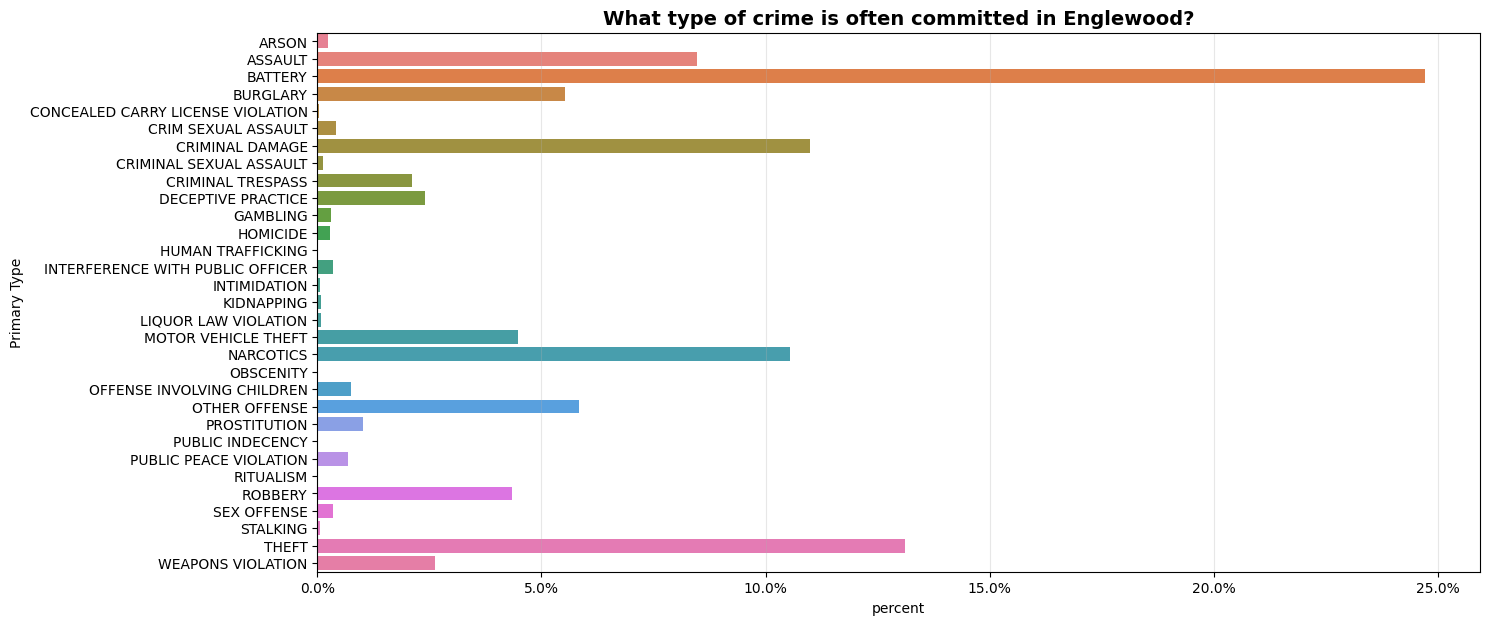

In [103]:
often_crime = englewood_df.groupby('Primary Type').size().reset_index(name="crimes")
often_crime['percent'] = (often_crime['crimes'] / often_crime['crimes'].sum()) * 100 # math to get percent
often_crime
sns.barplot(data = often_crime, y = 'Primary Type', x = 'percent', orient = 'h', hue = 'Primary Type')
plt.gcf().set_size_inches(15,7)
plt.title("What type of crime is often committed in Englewood?", fontsize=14, weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%')) # format to % for better understanding of numbers
plt.grid(axis='x', alpha=0.3)
plt.show()

## 13: Insight
***
so basically, the most type of crime  comitted is battery in Engelwood. first, the neighborhood used to be pretty solid, like middle-class with busy businesses and community stuff, but over the years jobs left, money got tight, and things kinda went downhill. people live in crowded conditions, so small fights can blow up into bigger violent stuff. then, schools, jobs, and community programs haven’t really bounced back, so yeah, there’s not much to keep people busy — and sometimes conflicts just happen. theft and drug crimes are also pretty common, mostly ‘cause money’s tight and drugs are around, plus gangs are active too, which just pushes those numbers higher. basically, it’s a mix of money struggles, lack of resources, and some gang influence that makes battery the top crime in englewood. kinda sad, but a lot of it comes down to how the neighborhood’s been managed over the years.

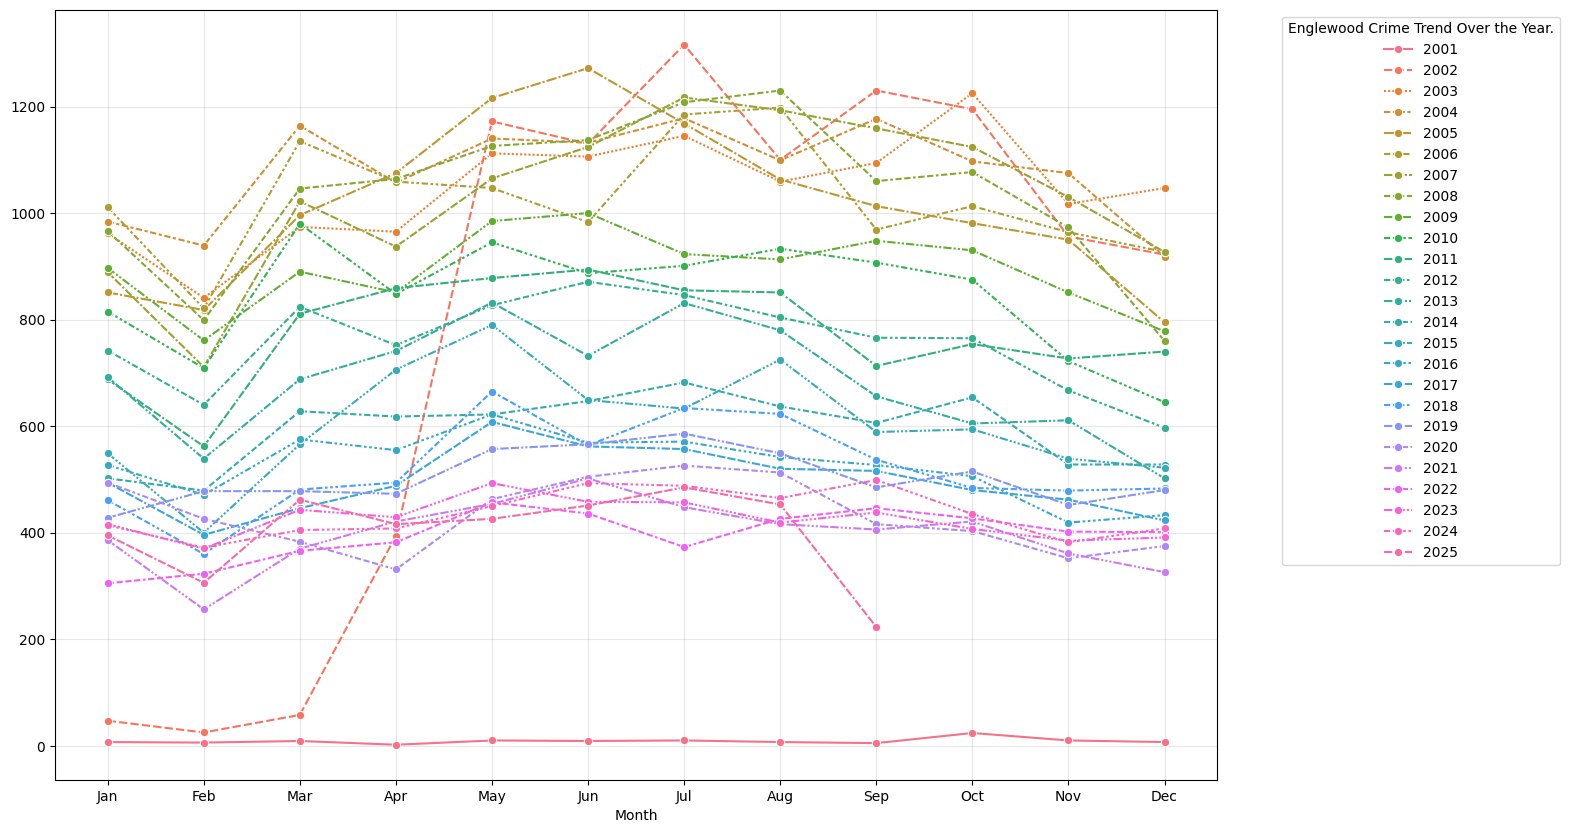

In [104]:
crime_trend_engelwood = englewood_df.groupby(['Year', 'Month']).size().unstack(level=0)
crime_trend_engelwood
sns.lineplot(crime_trend_engelwood, marker ='o')
plt.gcf().set_size_inches(15,10)
plt.legend(title='Englewood Crime Trend Over the Year.' ,bbox_to_anchor = (1.05,1), loc='upper left')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

## 14: Insight
***
so basically, crime in englewood kinda follows a pattern — it usually spikes in the summer, like july and august, when it’s hot and tensions run higher. most years, stuff starts going up in may, hits the peak mid-year, then slowly drops off in fall and winter. january and february? usually the chillest months — people are inside more or just recovering from the holidays.

but the bigger thing is, crime has dropped a lot since the early 2000s. if you look at 2001–2006, the numbers were crazy high, like over 1,000 incidents a month sometimes. now, in 2020–2025, most months are more like 300–600 — a huge drop. the pandemic probably played a part — lockdowns, less people out, more police focus — but even after that, crime stayed lower than before.

some years do stand out — like 2024 and 2025 — where crime looks like it’s creeping back up a bit, especially in the summer. but even then, it’s nowhere near the early 2000s. so yeah, the “summer surge” thing is still there, but overall crime is way lower now — good news for people living there.

overall, crime in englewood isn’t random — it’s seasonal, kinda predictable, and trending downward. if you had to pick the safest time? probably late winter or early spring. the riskiest? definitely mid-summer, especially july.

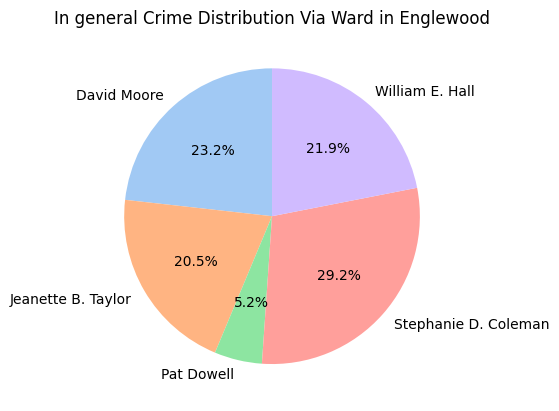

In [105]:
crime_distribution = englewood_df.groupby('ward_rep').size()
colors = sns.color_palette('pastel')
plt.pie(crime_distribution, labels = crime_distribution.index, autopct = '%1.1f%%', startangle = 90, colors=colors)
plt.title('In general Crime Distribution Via Ward in Englewood')
plt.show()

## 15: Insight
***
so look, this pie chart kinda shows that crime in englewood isn’t spread out evenly — it’s mostly packed in one spot: stephanie d. coleman’s ward, which is like 30% of all crime in the hood. that’s not just “a lot” — it’s almost a third of everything reported.

right after that, david moore’s ward at 23.2% and william e. hall’s at 21.9% — together those two are almost half the total. then jeanette b. taylor’s ward comes in at 20.5%, still big but less than the top spots. and lastly, pat dowell’s ward is the tiniest slice at just 5.2%, meaning crime there is way lower than the others.

so what’s this telling us? even tho englewood is just one neighborhood, crime isn’t happening everywhere equally — it’s clustered in certain wards. if u tryna know where cops or resources should go, stephanie d. coleman’s ward is def the main focus. but also, pat dowell’s ward seems to be doing something right — maybe better policing, community programs, or neighborhood watches.

overall, the chart shows englewood’s crime problem isn’t the same everywhere — it’s localized. so if u wanna make real change, u don’t gotta fix the whole hood, just focus on the few wards where most of the crime’s actually happening.

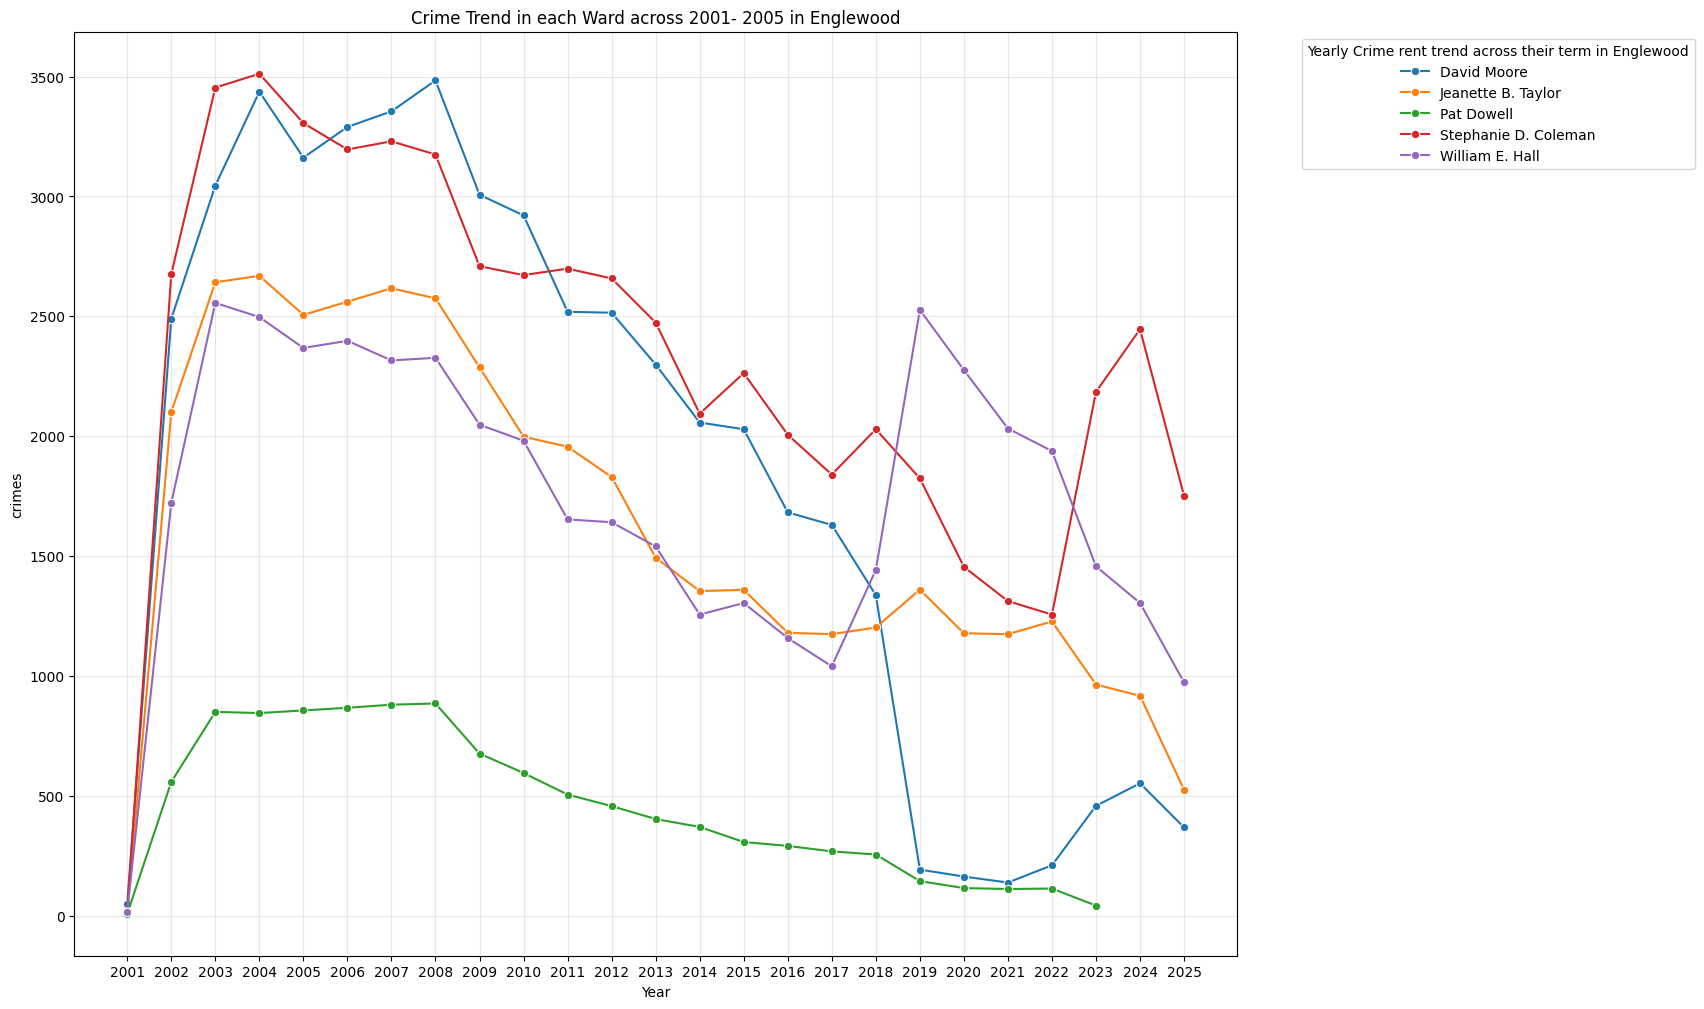

In [106]:
crime_trend_term = englewood_df.groupby(['Year', 'ward_rep']).size().reset_index(name='crimes')
sns.lineplot(data = crime_trend_term, y = 'crimes', x = 'Year', hue = 'ward_rep', marker = 'o')
plt.gcf().set_size_inches(15,12)
plt.legend(title='Yearly Crime rent trend across their term in Englewood', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Crime Trend in each Ward across 2001- 2005 in Englewood')
plt.xticks(crime_trend_term['Year'].unique()) # newly found  method of putting xticks!!!!!
plt.grid(alpha=0.3) 

## 16: Insight
***
so look, this chart shows that crime trends in englewood aren’t the same across wards — it really depends on who’s representing each spot.

stephanie d. coleman’s ward (red line) has always had the highest numbers — like often over 3,000 incidents per year, especially in her early terms. it dipped a bit around 2015–2018, but then spiked again in 2023–2024 before dropping a little in 2025. so yeah, some ups and downs, but her ward still carries the heaviest load.

david moore’s ward (blue) started high too — peaking around 2004–2008 — but then dropped hard after 2010, now sitting around 500–600 crimes in recent years. that’s a big improvement, maybe because of community programs, better policing, or population changes.

jeanette b. taylor’s ward (orange) shows a steady slow decline — starting near 2,500 in the early 2000s and now under 1,000. not super dramatic, but consistent, like it’s slowly cooling off.

william e. hall’s ward (purple) is kinda all over the place — spiking in 2003, dipping low in 2019, then jumping again in 2023. super volatile, maybe because of changing demographics, policy stuff, or even how data’s reported.

then there’s pat dowell’s ward (green) — the quietest one. crime never really went above 1,000, and by 2025 it’s barely above 50. so if u wanna know where it’s safest or most chill? that’s the one.

so yeah, the takeaway? crime isn’t just going down everywhere — it’s dropping differently in each ward. some reps got big improvements, others still deal with crazy high numbers. if u look close, wards with the biggest drops (like david moore’s) might be doing something right — while the ones that stay high (like stephanie d. coleman’s) probably need more focus and support.

In [107]:
englewood_locations = list(zip(englewood_df['Latitude'], englewood_df['Longitude']))

englewoodMap = folium.Map(locations = [englewood_df['Latitude'].mean(), englewood_df['Longitude'].mean()], zoom_start=10)
HeatMap(englewood_locations,min_opacity=0.5,radius=15, blur=10).add_to(englewoodMap)
englewoodMap.save('englewood_map.html')
englewoodMap

## 17: Insight
***
i’ve noticed in the heatmap that almost every street in englewood has a crime hotspot, especially around Englewood Terrace, an apartment building near South Lowe Avenue. honestly, there’s basically nowhere in englewood that doesn’t show some hotspot for crime.

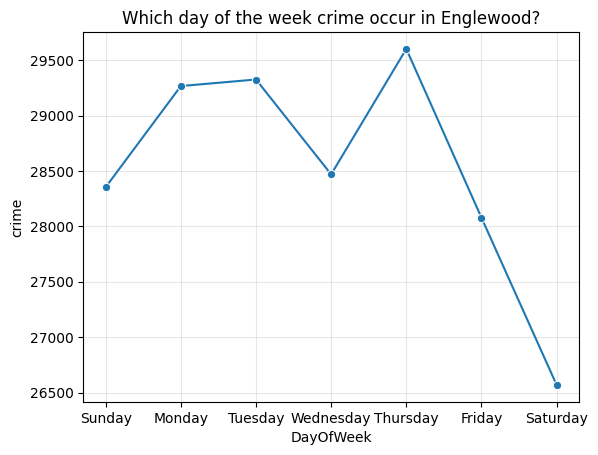

In [108]:
crime_trend_week = englewood_df.groupby('DayOfWeek').size().reset_index(name = 'crime')
sns.lineplot(data = crime_trend_week, x = 'DayOfWeek', y = 'crime', marker = 'o')
plt.title('Which day of the week crime occur in Englewood?')
plt.xticks(range(0, 7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday'])
plt.grid(alpha=0.3) 

## 18: Insight
***
so look, crime in englewood ain’t random across the week — it actually follows a pattern. thursday is the craziest day, hitting almost 29,500 incidents, not just a little higher — it’s the peak of the week, maybe because ppl are out more after work or tensions build up before the weekend. monday and tuesday are also kinda high, around 29,000, and wednesday dips a bit but not by much. then friday drops to about 28,000, and saturday hits the lowest point, under 26,500, which is kinda surprising since weekends usually feel wilder, but saturday here’s actually the chillest. sunday starts low but climbs back up, maybe because weekend stuff spills over or ppl are out again. the takeaway? crime ain’t highest on friday or saturday like u’d think — thursday’s the real peak, probably due to mid-week stress, social hangouts, or certain crimes like theft and assault happening more then. so if u wanna stay safe, thursday is the riskiest day, especially late afternoon or evening, while saturday’s surprisingly calm. overall, englewood’s crime has its own rhythm, and thursday is king.

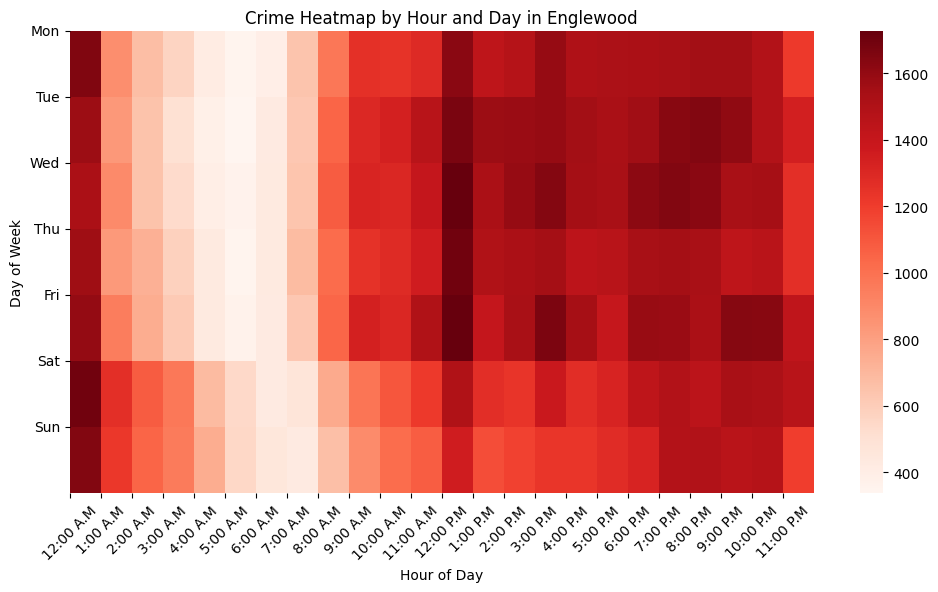

In [109]:
dangerous_hours_englewood = englewood_df.groupby(['DayOfWeek', 'HourOfDay']).size().unstack(level=0).T
plt.figure(figsize=(12,6))
sns.heatmap(dangerous_hours_englewood, cmap="Reds", annot=False)
plt.title('Crime Heatmap by Hour and Day in Englewood')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=[0,1,2,3,4,5,6], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
plt.xticks(range(0, 24), ['12:00 A.M', '1:00 A.M', '2:00 A.M', '3:00 A.M', '4:00 A.M', '5:00 A.M', 
        '6:00 A.M', '7:00 A.M', '8:00 A.M', '9:00 A.M', '10:00 A.M', '11:00 A.M',
        '12:00 P.M', '1:00 P.M', '2:00 P.M', '3:00 P.M', '4:00 P.M', '5:00 P.M', 
        '6:00 P.M', '7:00 P.M', '8:00 P.M', '9:00 P.M', '10:00 P.M', '11:00 P.M'],rotation=45)
plt.show()

## 19: Insight
***
So looking at the Heatmap, it shows that crime in Englewood isn’t random — it follows a clear pattern. the worst time? thursday and friday nights, especially 7–11 PM, when the darkest red shows up on the heatmap. probably cuz ppl are out after work, bars and streets are busy, or tensions build heading into the weekend. early mornings 3–5 AM are the calmest, and saturday/sunday nights are surprisingly chill. midday is usually okay, except thursday and friday where some heat shows up, maybe from lunch breaks or school dismissals. monday through wednesday is steady but not extreme. overall, thursday late afternoon + evening is basically the “perfect storm” for crime in Englewood, so if u wanna stay safe, avoid being out late thursday/friday — other times are mostly chill.

## Loop Analysis ('central business district')
***
<img src='https://cdn.britannica.com/68/79568-050-67215383/train-line-Loop-Chicago.jpg'>

In [110]:
loop_df = data[data['community_name'] == 'Loop']
loop_df

Date         Primary Type        Description  \
3       2017-08-26 10:00:00  CRIM SEXUAL ASSAULT     NON-AGGRAVATED   
4       2023-09-06 17:00:00      CRIMINAL DAMAGE         TO VEHICLE   
5       2023-09-06 11:00:00                THEFT          OVER $500   
146     2023-09-06 13:30:00              ASSAULT             SIMPLE   
210     2023-08-03 19:55:00                THEFT          OVER $500   
...                     ...                  ...                ...   
8409995 2025-09-20 17:21:00              ASSAULT             SIMPLE   
8410022 2025-09-20 17:00:00                THEFT          OVER $500   
8410090 2025-09-21 00:00:00                THEFT          OVER $500   
8410092 2025-09-20 09:30:00   DECEPTIVE PRACTICE  CREDIT CARD FRAUD   
8410191 2025-09-20 12:00:00                THEFT     $500 AND UNDER   

                           Location Description  Arrest  Domestic  District  \
3                                   HOTEL/MOTEL   False     False       1.0   
4        PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False       1.0   
5        PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False       1.0   
146                                  DRUG STORE   False     False       1.0   
210                               PARK PROPERTY   False     False       1.0   
...                                         ...     ...       ...       ...   
8409995                      SMALL RETAIL STORE    True     False       1.0   
8410022                           BAR OR TAVERN   False     False       1.0   
8410090                                SIDEWALK   False     False       1.0   
8410092                               CTA TRAIN   False     False       1.0   
8410191                               CTA TRAIN   False     False       1.0   

         Ward  Community Area FBI Code  Year   Latitude  Longitude  Month  \
3        42.0            32.0       02  2017  41.842530 -87.671292      8   
4        42.0            32.0       14  2023  41.886018 -87.633938      9   
5         4.0            32.0       06  2023  41.871835 -87.626151      9   
146      42.0            32.0      08A  2023  41.884476 -87.631311      9   
210      42.0            32.0       06  2023  41.874120 -87.624224      8   
...       ...             ...      ...   ...        ...        ...    ...   
8409995  34.0            32.0      08A  2025  41.881718 -87.627760      9   
8410022  34.0            32.0       06  2025  41.885433 -87.626265      9   
8410090  42.0            32.0       06  2025  41.885742 -87.631345      9   
8410092   4.0            32.0       11  2025  41.876608 -87.627644      9   
8410191  42.0            32.0       06  2025  41.885888 -87.627942      9   

         Day  DayOfWeek  HourOfDay  MinuteOfDay community_name  \
3         26          5         10            0           Loop   
4          6          2         17            0           Loop   
5          6          2         11            0           Loop   
146        6          2         13           30           Loop   
210        3          3         19           55           Loop   
...      ...        ...        ...          ...            ...   
8409995   20          5         17           21           Loop   
8410022   20          5         17            0           Loop   
8410090   21          6          0            0           Loop   
8410092   20          5          9           30           Loop   
8410191   20          5         12            0           Loop   

                   ward_rep  
3            Brendan Reilly  
4            Brendan Reilly  
5        Lamont J. Robinson  
146          Brendan Reilly  
210          Brendan Reilly  
...                     ...  
8409995      William Conway  
8410022      William Conway  
8410090      Brendan Reilly  
8410092  Lamont J. Robinson  
8410191      Brendan Reilly  

[199660 rows x 20 columns]

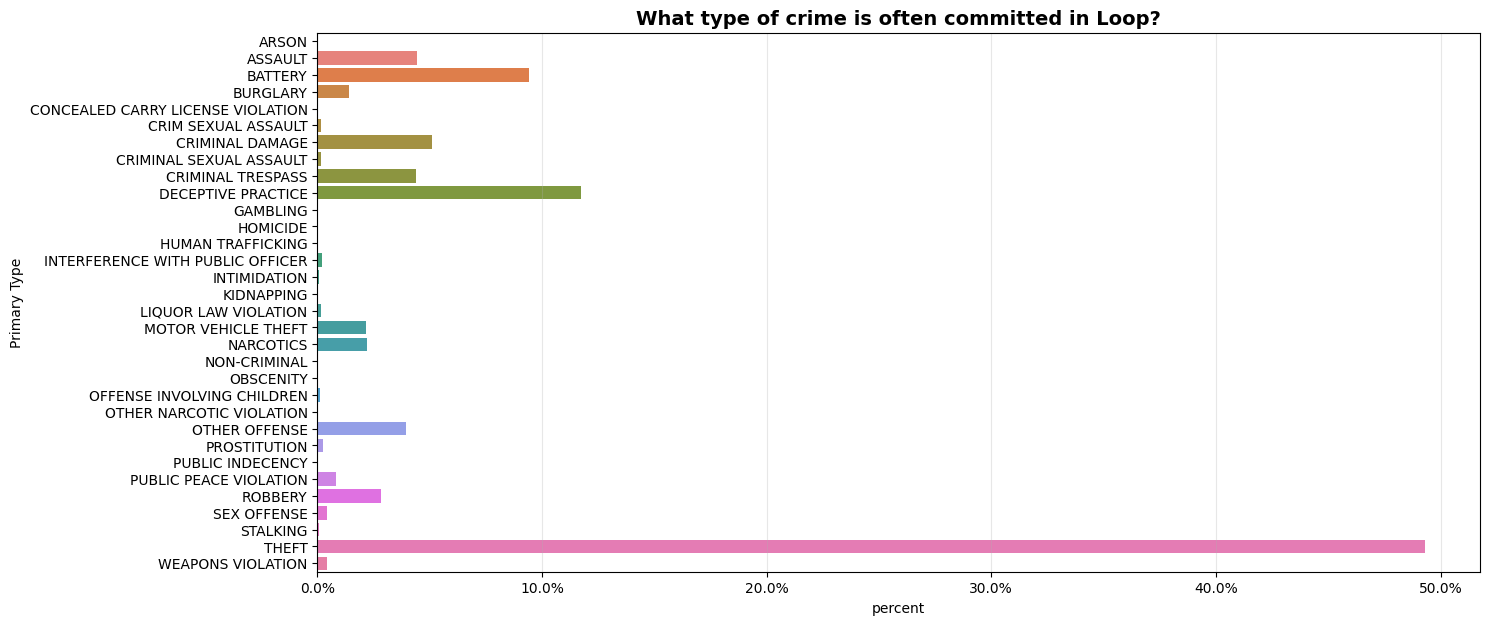

In [111]:
often_crime = loop_df.groupby('Primary Type').size().reset_index(name="crimes")
often_crime['percent'] = (often_crime['crimes'] / often_crime['crimes'].sum()) * 100 # math to get percent
often_crime
sns.barplot(data = often_crime, y = 'Primary Type', x = 'percent', orient = 'h', hue = 'Primary Type')
plt.gcf().set_size_inches(15,7)
plt.title("What type of crime is often committed in Loop?", fontsize=14, weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%')) # format to % for better understanding of numbers
plt.grid(axis='x', alpha=0.3)
plt.show()

## 20: Insight
***
So from the chart, The crime in the Loop is way different from spots like Englewood — it’s not about violent stuff or people breaking into homes. it’s mostly theft, making up almost half of all reported crimes, like 48%. basically, 1 in 2 crimes here is someone stealing something — phones, wallets, bags, or even cars.

right behind that? motor vehicle theft and narcotics, each around 5–7%, which makes sense since downtown’s full of cars, tourists, and late-night crowds. then comes criminal damage (broken windows, graffiti) and battery, both around 4–5%, so yeah, violence happens but it’s not the main thing.

what’s wild? crimes like homicide, kidnapping, or human trafficking barely show up — not cuz they never happen, just super rare compared to everyday thefts. even robbery is low, around 3%, meaning most thefts are non-confrontational — pickpockets, smash-and-grabs, or just grabbing stuff when no one’s looking. stuff like prostitution, public indecency, or ritualism? they exist, but under 2% each.

overall, if u wanna stay safe in the Loop: keep ur stuff close, especially in crowds, transit spots, or tourist areas; don’t leave valuables in ur car; violent crime’s rare, but still stay aware at night. the takeaway? the Loop ain’t dangerous like u might think — it’s mostly stuff disappearing, not people hurting people. knowing that helps u stay safe without stressing.

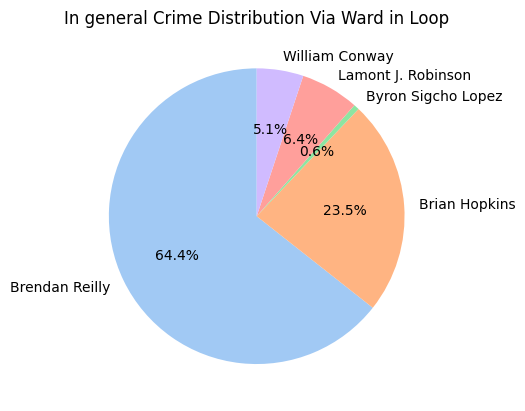

In [112]:
crime_distribution = loop_df.groupby('ward_rep').size()
colors = sns.color_palette('pastel')
plt.pie(crime_distribution, labels = crime_distribution.index, autopct = '%1.1f%%', startangle = 90, colors=colors)
plt.title('In general Crime Distribution Via Ward in Loop')
plt.show()

## 21: Insight
***
so look, this pie chart shows that crime in the Loop isn’t spread out evenly — it really depends on how each ward is managed. brendan reilly’s ward takes the lead with 64.4% of all incidents. that’s huge, but not just cuz of geography — his ward covers the busiest parts of downtown: transit hubs, shopping areas, and tourist spots. reilly’s style leans toward supporting business growth and downtown activity, which brings more people into public spaces — and yeah, more chances for crime.

next up is brian hopkins’ ward at 23.5%. he’s more regulatory and residential-focused, which probably explains why crime isn’t as concentrated as in reilly’s ward. it’s still kinda high since some commercial spots overlap, but his hands-on community approach seems to keep extreme spikes down.

the other wards — lamont j. robinson (6.4%), william conway (5.1%), and byron sigcho lopez (0.6%) — barely show up in crime share. they focus on residential stability, neighborhood engagement, and smaller-scale development, which likely keeps public-space crimes low. less foot traffic, fewer busy commercial zones, and active constituent services = quieter areas.

so yeah, what this chart really tells us? crime in the Loop isn’t just about geography — it shows how each alderman runs their ward. high-crime spots match reilly’s busy, business-heavy approach, while quieter wards reflect more residential-focused leadership. if u wanna tackle crime effectively, focus on the hotspots shaped by leadership, not just the map.

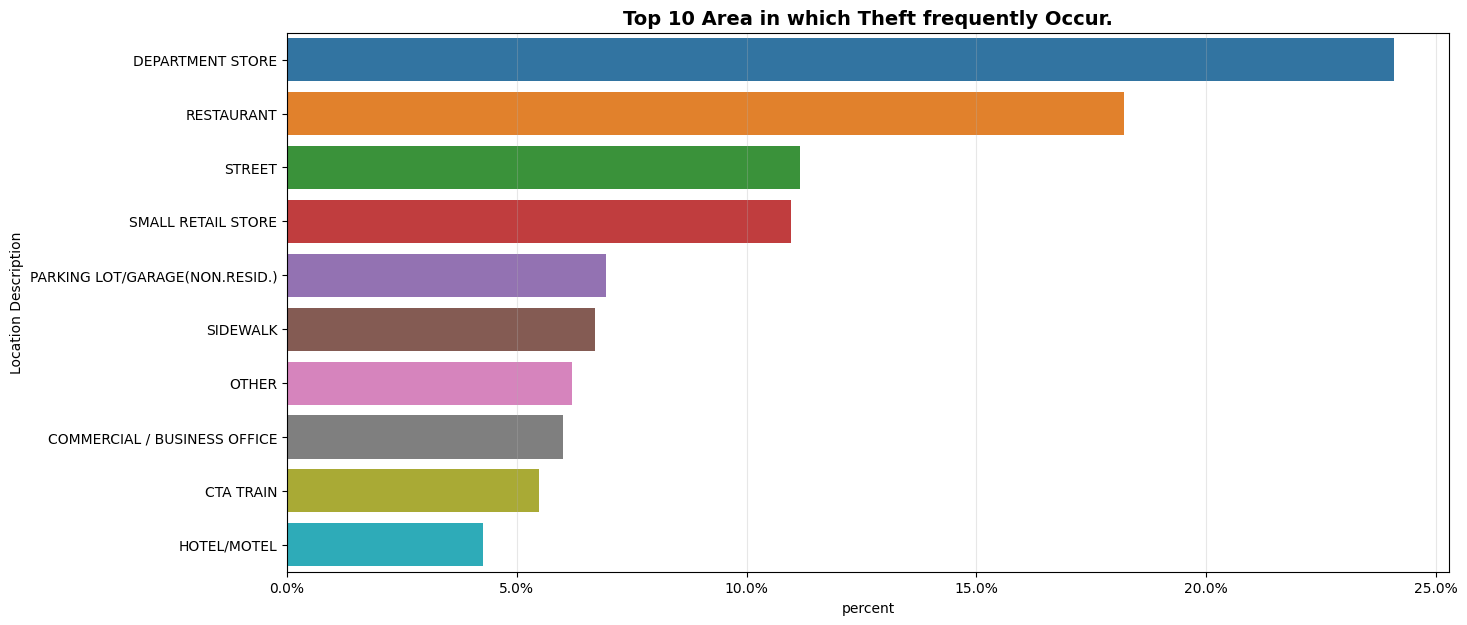

In [113]:
loop_theft_df = loop_df[loop_df['Primary Type'] == 'THEFT']
hotspot_theft_area = loop_theft_df.groupby('Location Description').size().reset_index(name = 'theft_crime').nlargest(10, 'theft_crime')
hotspot_theft_area['percent'] = (hotspot_theft_area['theft_crime'] / hotspot_theft_area['theft_crime'].sum()) * 100 # math to get percent
sns.barplot(data = hotspot_theft_area, y = 'Location Description', x = 'percent', orient = 'h', hue = 'Location Description')
plt.gcf().set_size_inches(15,7)
plt.title("Top 10 Area in which Theft frequently Occur.", fontsize=14, weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%')) # format to % for better understanding of numbers
plt.grid(axis='x', alpha=0.3)
plt.show()

## 22 :Insight
***
so look, theft in the Loop aint random — it mostly happens where ppl r distracted, busy, or carryin stuff. if u kno where to watch out (or avoid), u can stay safer.

department stores r the #1 hotspot, makin up almost 24% of all thefts. not surprisin — crowded aisles, fitin rooms, checkout lines, tourists with bags… perfect for pickpockets or shoplifters. if ur shoppin downtown, keep bags zipped, phones tucked, and eyes on ur stuff.

restaurants come in 2nd, around 18% — ppl leave phones or wallets on tables, bags under chairs, or just chill too much late at nite. streets and sidewalks? big players too, around 12–13% each — ppl walkin with phones in hand, bags over shoulders, headphones on — easy targets, especially near transit stops or rush hour.

small retail stores (like boutiques or bodegas) make up another 11% — small spaces, less security, quick grab opps. parking lots/garages (non-residential) around 7%, so yeah, ur car is a target — dont leave valuables inside. commercial offices and hotels/motels, each around 5–6%, prob cuz ppl leave laptops, bags, or keys unattended. CTA trains? around 6%, not crazy high, but ppl doze off or leave bags on seats — easy snatches. “Other” spots cover about 7% — so even places we didnt expect see theft too.


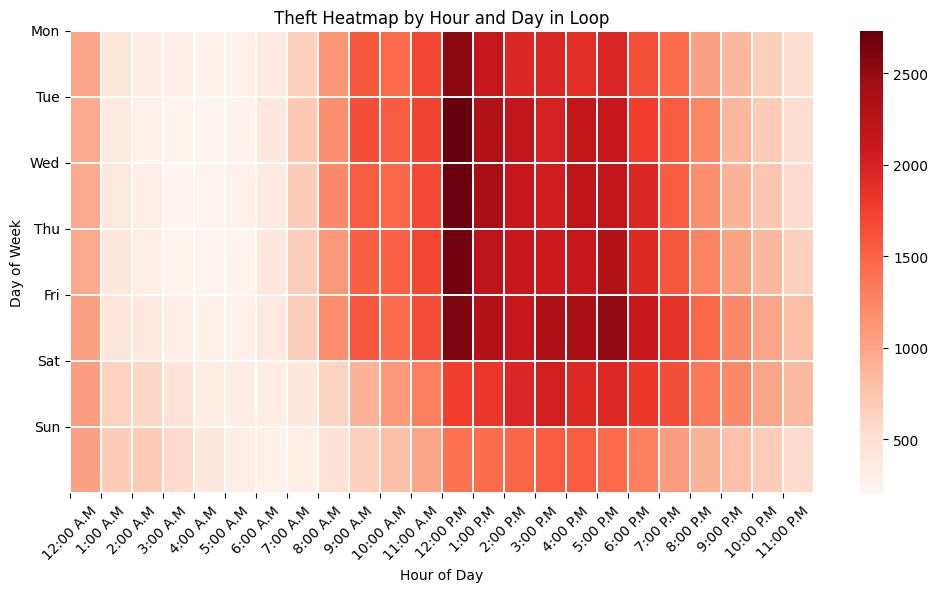

In [175]:
theft_hours_loop = loop_df.groupby(['DayOfWeek', 'HourOfDay']).size().unstack(level=0).T
plt.figure(figsize=(12,6))
sns.heatmap(theft_hours_loop, cmap="Reds", annot=False, linewidths=0.3)
plt.title('Theft Heatmap by Hour and Day in Loop')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=[0,1,2,3,4,5,6], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
plt.xticks(range(0, 24), ['12:00 A.M', '1:00 A.M', '2:00 A.M', '3:00 A.M', '4:00 A.M', '5:00 A.M', 
        '6:00 A.M', '7:00 A.M', '8:00 A.M', '9:00 A.M', '10:00 A.M', '11:00 A.M',
        '12:00 P.M', '1:00 P.M', '2:00 P.M', '3:00 P.M', '4:00 P.M', '5:00 P.M', 
        '6:00 P.M', '7:00 P.M', '8:00 P.M', '9:00 P.M', '10:00 P.M', '11:00 P.M'],rotation=45)
plt.show()

## 23: Insight 
***
the time you’re most likely to get your stuff stolen in the Loop is thursday and friday evenings, like 5–9 PM — that’s when the darkest red pops up and theft’s at its peak. probs cuz ppl are out after work, headin to dinner, shoppin, or catchin trains — phones out, bags open, wallets in pockets, and yeah, thieves totally know it. early mornings (3–6 AM) are dead quiet — streets empty, stores closed, ppl asleep, so theft drops way down. saturday and sunday? chill during the day, but pick up again in the evening (7–9 PM), maybe cuz tourists r out, bars busy, ppl distracted after a long day. midday (noon–3 PM) is usually safe, except thursday and friday where lunch breaks or shoppin sprees give thieves small chances. monday–wednesday is steady but nothing crazy — no huge spikes like thursday/friday, and no deep valleys like early mornings. bottom line: theft’s got a pattern — late afternoons/evenings are when ur stuff’s most at risk, early mornings quiet, midday kinda in the middle — so just know when to be extra careful and plan around it.

In [115]:
department_stores_loop_df = loop_df[loop_df['Location Description'] == 'DEPARTMENT STORE']
department_stores_locations = list(zip(department_stores_loop_df['Latitude'], department_stores_loop_df['Longitude']))

LoopMap = folium.Map(locations = [department_stores_loop_df['Latitude'].mean(), department_stores_loop_df['Longitude'].mean()], zoom_start=10)
HeatMap(department_stores_locations,min_opacity=0.5,radius=15, blur=10).add_to(LoopMap)
LoopMap.save('LoopMap.html')
LoopMap

## 24: Insight
***
so look, the biggest theft spots in the Loop r around State & Washington, busy sidewalks, Macy’s, Theatre District, and CTA station — crowded ppl, tourists, and distractions make it easy for thieves. Pedways under buildings, retail zones like Michigan Ave & State Street, and bus/train stops (7–9 PM) r hot too. early mornings (before 8 AM) and late nights (after 10 PM) r calm, and parks like Grant/Millennium are pretty safe. bottom line: theft happens where ppl r distracted, busy, or carryin stuff — quiet streets, parks, and less crowded blocks are safest.

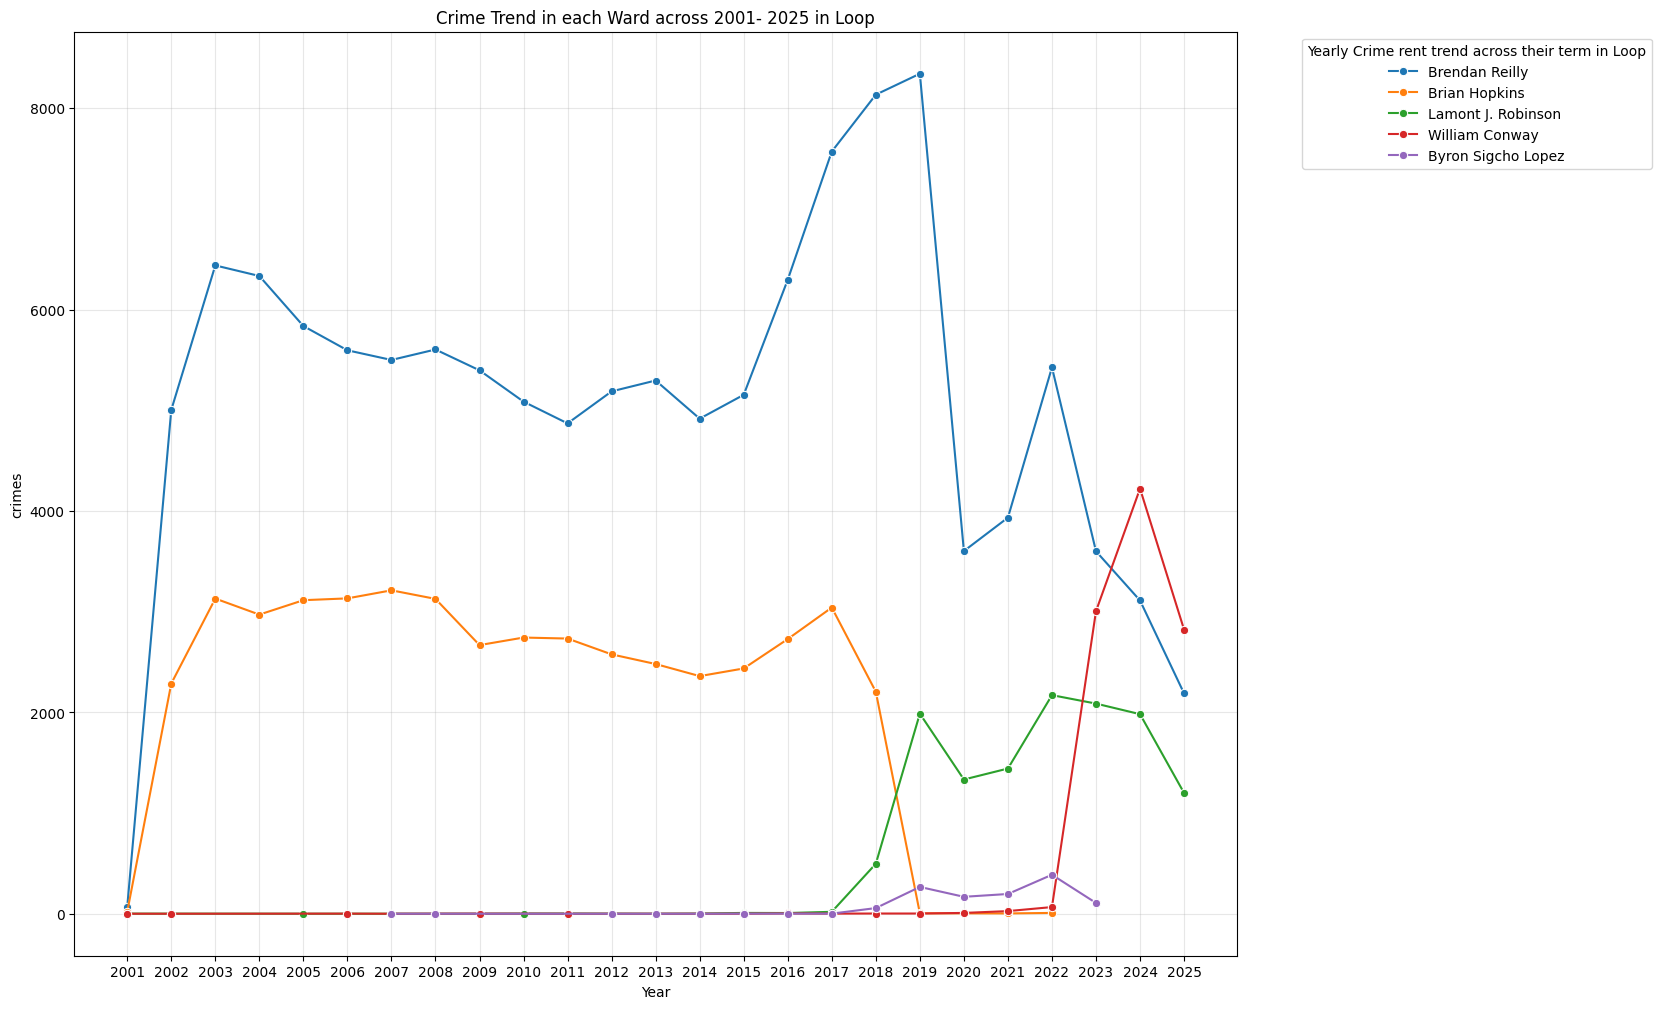

In [116]:
crime_trend_term = loop_df.groupby(['Year', 'ward_rep']).size().reset_index(name='crimes')
sns.lineplot(data = crime_trend_term, y = 'crimes', x = 'Year', hue = 'ward_rep', marker = 'o')
plt.gcf().set_size_inches(15,12)
plt.legend(title='Yearly Crime rent trend across their term in Loop', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Crime Trend in each Ward across 2001- 2025 in Loop')
plt.xticks(crime_trend_term['Year'].unique()) # newly found  method of putting xticks!!!!!
plt.grid(alpha=0.3) 

## 25: Insight
***
crime in the Loop changes a lot depending on the ward. Brendan Reilly’s ward is the biggest slice, peaking in the mid-2000s and spiking again in 2023–2024. Brian Hopkins’ ward started lower, dropped a lot after 2019, now one of the quietest. Lamont J. Robinson and William Conway’s wards had spikes later on, probably bcos of new developments or more foot traffic. Byron Sigcho Lopez’s ward stays super low — safest overall. honestly, i think the crime rate doesn’t mean bad political management, it just differs on which ward they handle and the kind of area it covers.

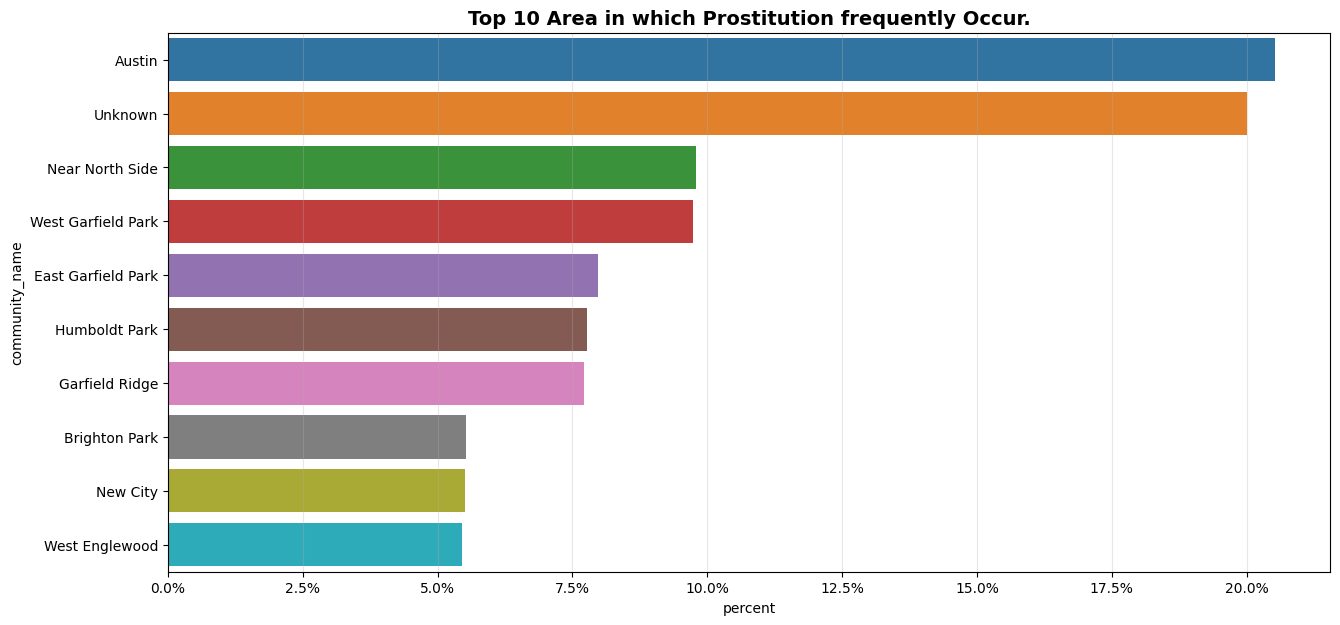

In [118]:
prostitute_df = data[data['Primary Type'] == 'PROSTITUTION']
prostiture_datas = prostitute_df.groupby('community_name').size().reset_index(name='prostitution_crime').nlargest(10, 'prostitution_crime')
prostiture_datas['percent'] = (prostiture_datas['prostitution_crime'] / prostiture_datas['prostitution_crime'].sum()) * 100 # math to get percent
sns.barplot(data = prostiture_datas, y = 'community_name', x = 'percent', orient = 'h', hue = 'community_name')
plt.gcf().set_size_inches(15,7)
plt.title("Top 10 Area in which Prostitution frequently Occur.", fontsize=14, weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%')) # format to % for better understanding of numbers
plt.grid(axis='x', alpha=0.3)
plt.show()

## 26: Insight
***
Austin tops the list for prostitution — over 20% of all reported cases, like one in five. probs cuz it’s big, dense, got major roads, transit, and some low-monitor spots — easier for stuff to fly under the radar. “Unknown” is second at almost 20%, which doesn’t mean it didn’t happen, just that the spot wasn’t recorded or couldn’t be pinned — could be reporting gaps, transient activity, or data errors. Near North Side hits around 10% — residential, commercial, nightlife, hotels, bars, busy streets, easy to blend in. West Garfield Park also ~10% — high foot traffic, economic struggles, less police in some blocks. East Garfield Park, Humboldt Park, Garfield Ridge sit around 7–8% — working-class areas, housing, small businesses, public spaces — ppl can operate under the radar. Brighton Park, New City, West Englewood ~5–6% — smaller but still notable, maybe more community oversight or fewer hotspots. bottom line? prostitution isn’t everywhere — it’s in spots with less visibility, more anonymity, or high foot traffic. Austin dominates, but other neighborhoods share the burden, so it’s a citywide thing with local hotspots, and the “Unknown” cases hint the real numbers could be even higher.

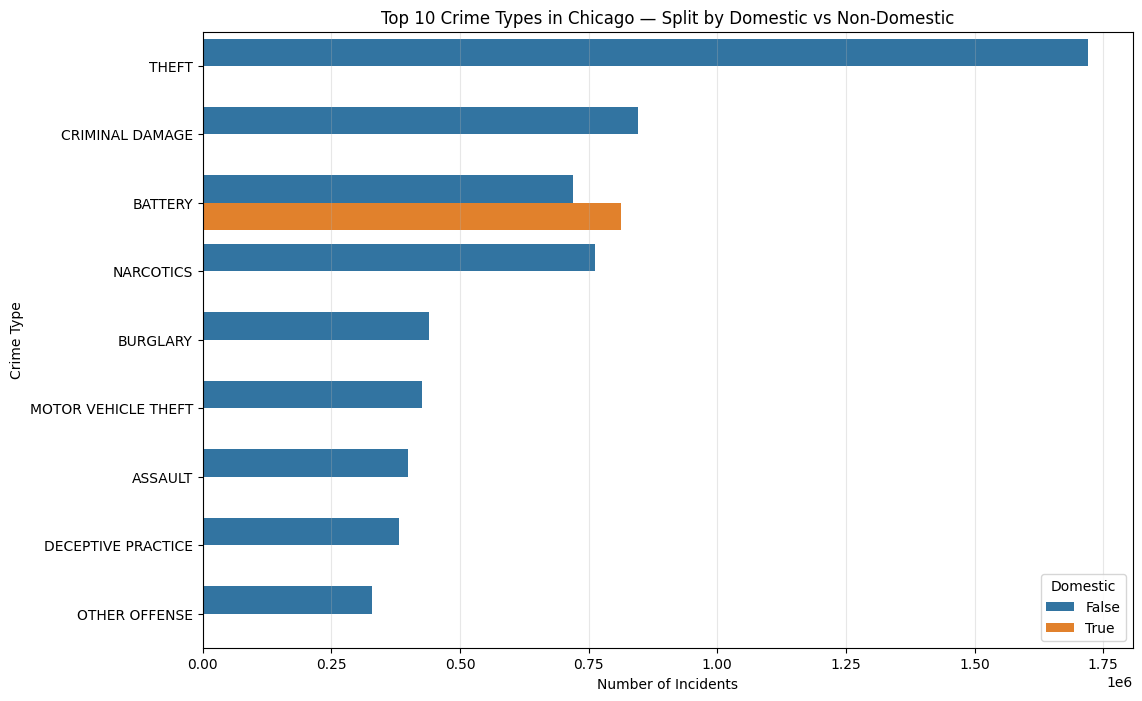

In [119]:
top_crimes = data.groupby(['Primary Type', 'Domestic']).size().reset_index(name='count').nlargest(10, 'count')
top_crimes
plt.figure(figsize=(12, 8))
sns.barplot(data=top_crimes, y='Primary Type', x='count', orient='h', hue = 'Domestic')
plt.title('Top 10 Crime Types in Chicago — Split by Domestic vs Non-Domestic')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.grid(axis='x', alpha=0.3)
plt.show()

## 27: Insight
***
Theft dominates Chicago’s crime scene, with over 1.7 million incidents, and nearly all are non-domestic—classic street-level crimes like pickpocketing, shoplifting, and car break-ins. Battery is the only top-10 crime with a noticeable domestic component, but even then, most cases happen in public, not at home. Other major crimes—criminal damage, narcotics, burglary, motor vehicle theft—are overwhelmingly non-domestic.

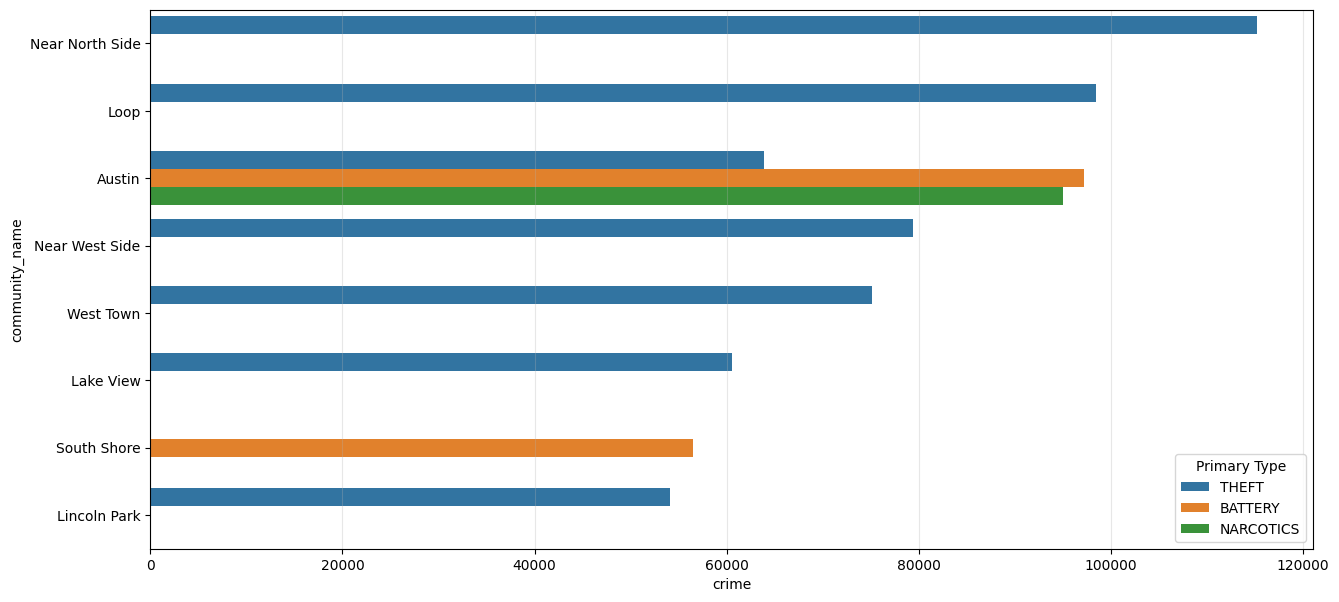

In [120]:
hist_data = area_no_uknown.groupby(['community_name', 'Primary Type']).size().reset_index(name = "crime").nlargest(10, 'crime')
sns.barplot(data = hist_data, y = 'community_name', x = 'crime', orient = 'h', hue = 'Primary Type')
plt.gcf().set_size_inches(15,7)
plt.grid(axis='x', alpha=0.3)
plt.show()

## 28: Insight
***
The Near North Side and Loop stand out as the communities with the highest total crimes, dominated by theft. Austin shows a more diverse profile, with battery and narcotics also contributing significantly to its crime count, while South Shore also has notable battery incidents. Most other top communities—like Near West Side, West Town, Lake View, and Lincoln Park—are heavily driven by theft.

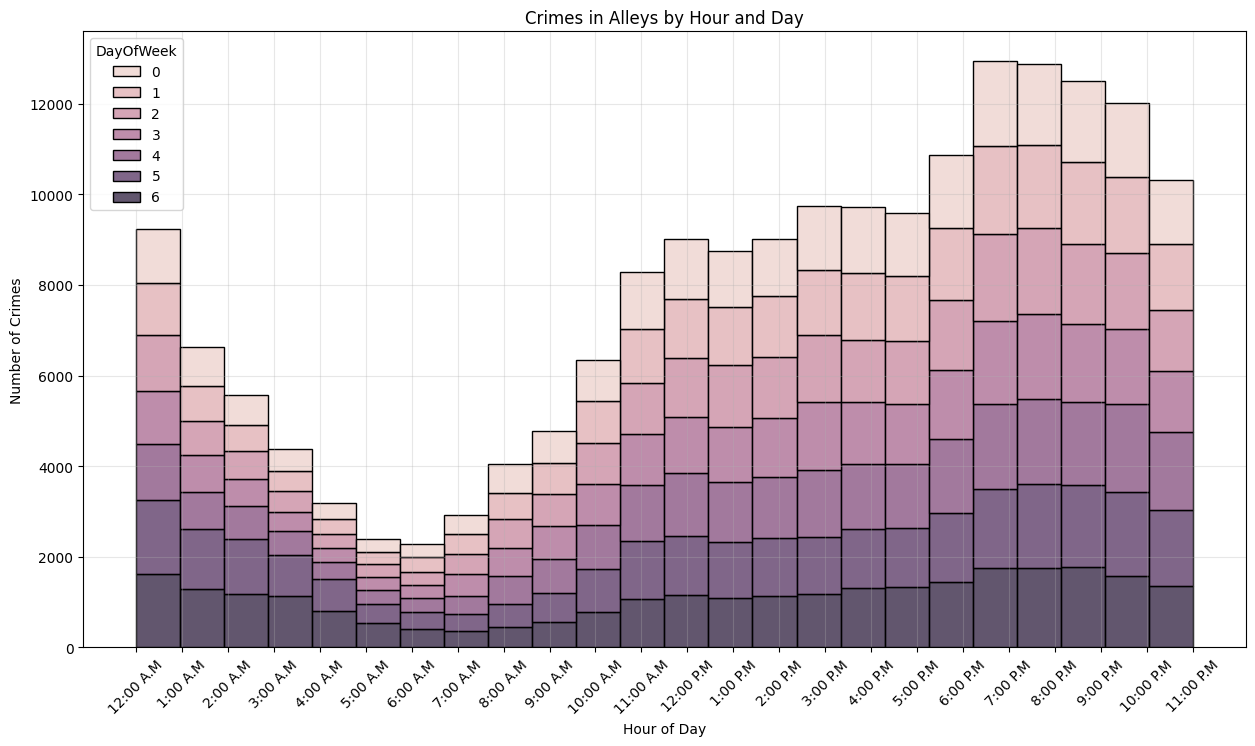

In [121]:
alley_df = data[data['Location Description'] == 'ALLEY']
alley_danger = alley_df.groupby(['DayOfWeek','HourOfDay']).size().reset_index(name = 'crime')
plt.figure(figsize=(15, 8))
sns.histplot(data = alley_danger, x = 'HourOfDay', hue = 'DayOfWeek', weights='crime', multiple='stack', bins=24)
plt.xticks(range(0, 24), ['12:00 A.M', '1:00 A.M', '2:00 A.M', '3:00 A.M', '4:00 A.M', '5:00 A.M', 
        '6:00 A.M', '7:00 A.M', '8:00 A.M', '9:00 A.M', '10:00 A.M', '11:00 A.M',
        '12:00 P.M', '1:00 P.M', '2:00 P.M', '3:00 P.M', '4:00 P.M', '5:00 P.M', 
        '6:00 P.M', '7:00 P.M', '8:00 P.M', '9:00 P.M', '10:00 P.M', '11:00 P.M'],rotation=45)
plt.title("Crimes in Alleys by Hour and Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

 ## 29: Insight
 ***
 Crimes in alleys spike during the evening hours, especially between 7 PM and 11 PM, with slightly lower activity on weekdays than weekends. Early mornings and late nights are relatively calm. This suggests alleys are most dangerous when people are out and about, highlighting the need for evening patrols or better lighting in these areas to reduce risk.

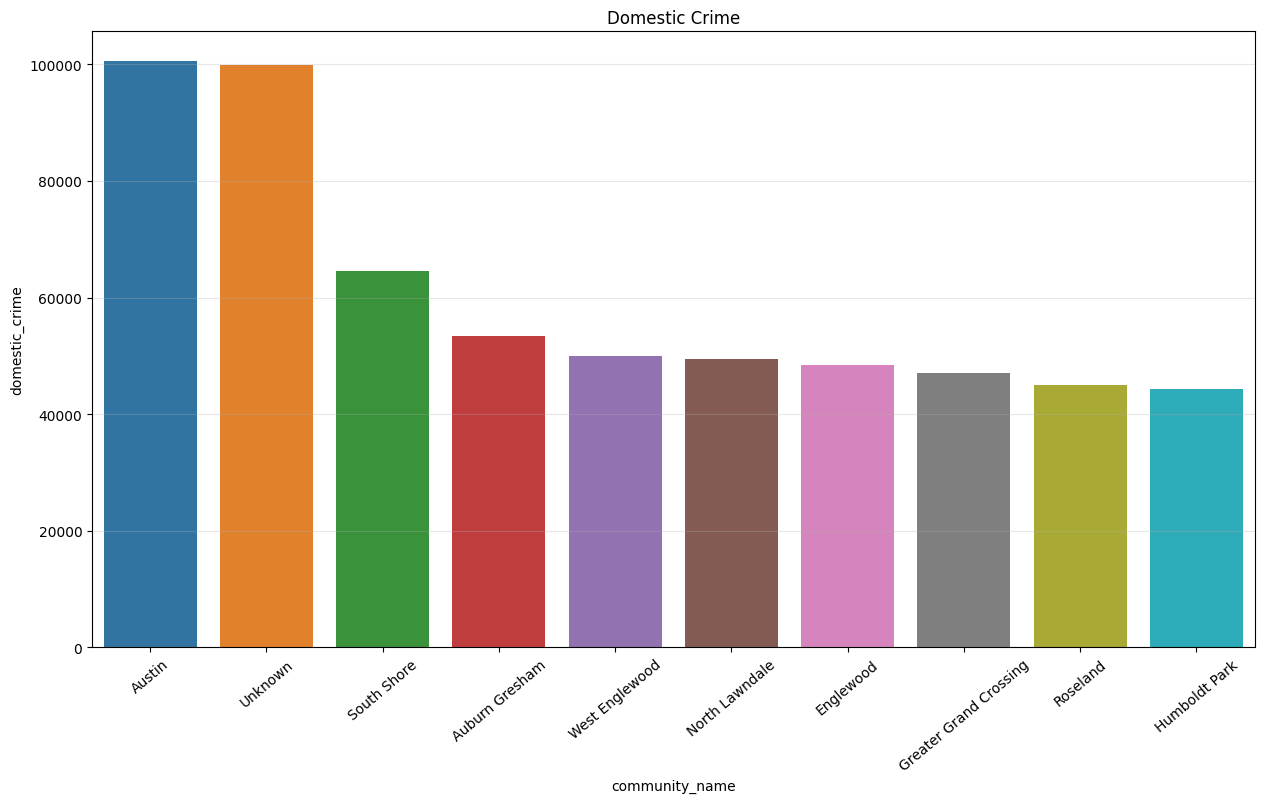

In [122]:
domestic_df = data[data['Domestic'] == True]
domestic_data = domestic_df.groupby('community_name').size().reset_index(name = 'domestic_crime').nlargest(10, 'domestic_crime')
plt.figure(figsize=(15, 8))
sns.barplot(data = domestic_data,  x = 'community_name', y = 'domestic_crime', hue = 'community_name')
plt.title('Domestic Crime')
plt.xticks(rotation=40)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 30: Insight
***
Austin tops domestic incidents with over 100k, probs cuz it’s big, dense, and low on support. “Unknown” is next, nearly 100k too, meaning a lot of cases aren’t tracked. South Shore, Auburn Gresham, West Englewood, North Lawndale, and Englewood all have 50k–65k — showing domestic violence hits certain neighborhoods harder. basically, it’s clustered, not random, and Austin + Unknown make up almost half the cases. tackling it means focusing there and remembering poverty, stress, and lack of support play a big role.

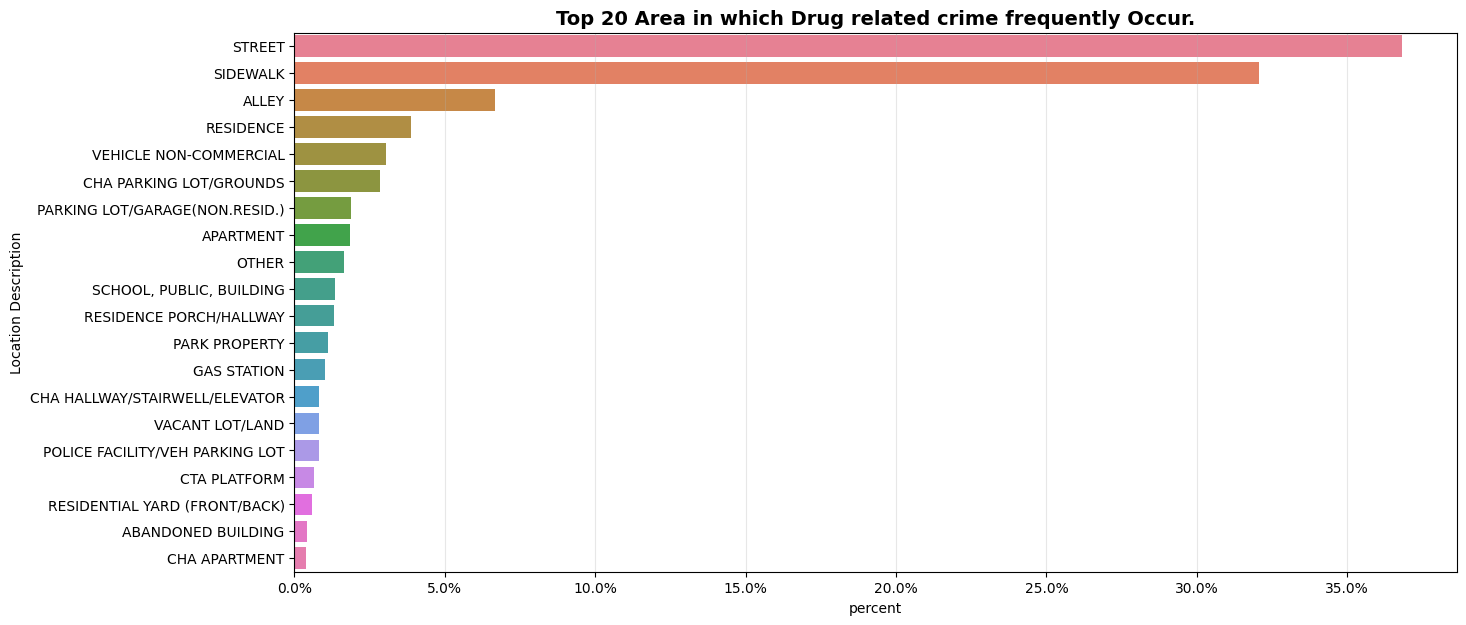

In [123]:
narcotics_df = data[data['Primary Type'] == 'NARCOTICS']
drugs_locations = narcotics_df.groupby('Location Description').size().reset_index(name = 'drugs').nlargest(20, 'drugs')
drugs_locations['percent'] = (drugs_locations['drugs'] / drugs_locations['drugs'].sum()) * 100 # math to get percent
sns.barplot(data = drugs_locations, y = 'Location Description', x = 'percent', orient = 'h', hue = 'Location Description')
plt.gcf().set_size_inches(15,7)
plt.title("Top 20 Area in which Drug related crime frequently Occur.", fontsize=14, weight="bold")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%')) # format to % for better understanding of numbers
plt.grid(axis='x', alpha=0.3)
plt.show()

## 31: Insight
***
streets and sidewalks make up over 30% of all drug crimes — that’s more than double the next spot (alleys). basically, open public spaces are the main stage for narcotics activity. makes sense tho — easy access, lots of foot traffic, and harder to control. this shows a big need for smarter policing, stronger community programs, or even redesigning those spaces to cut down the chances for this stuff to go down.

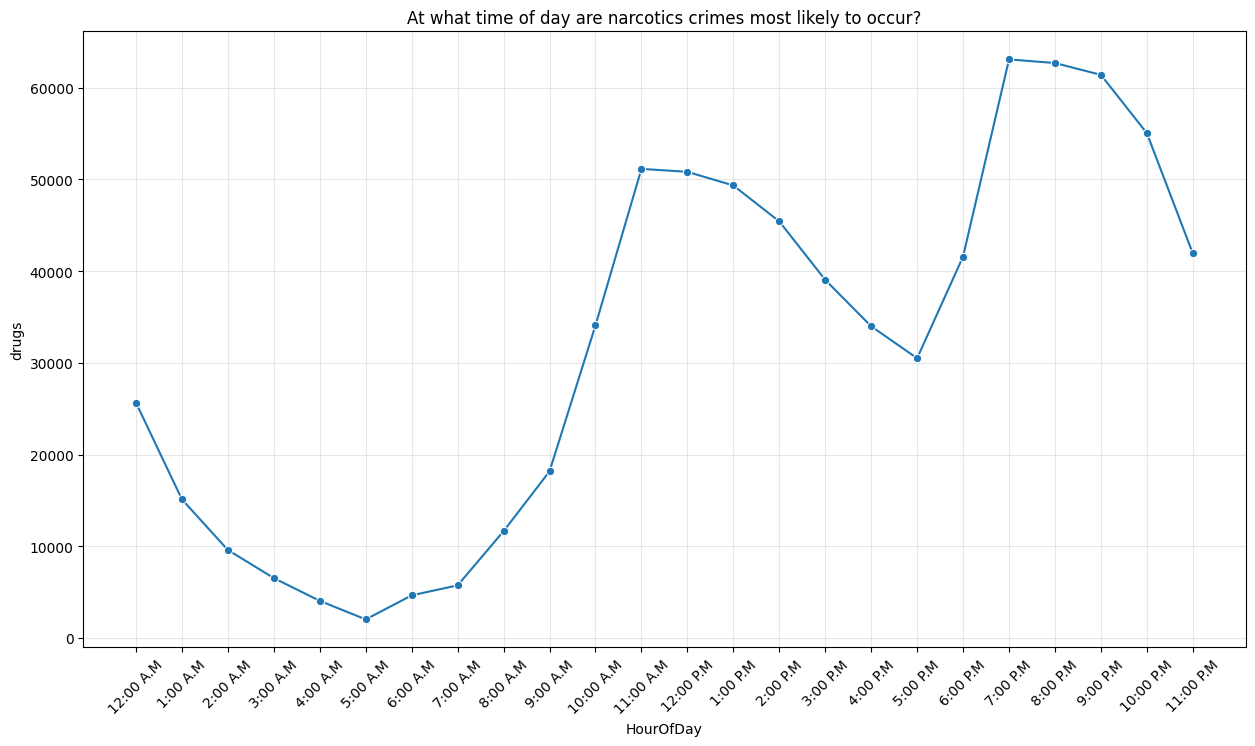

In [153]:
drugs_time = narcotics_df.groupby('HourOfDay').size().reset_index(name = 'drugs')
sns.lineplot(data = drugs_time, x = 'HourOfDay', y = 'drugs', marker = 'o')
plt.gcf().set_size_inches(15,8)
plt.xticks(range(0, 24), ['12:00 A.M', '1:00 A.M', '2:00 A.M', '3:00 A.M', '4:00 A.M', '5:00 A.M', 
        '6:00 A.M', '7:00 A.M', '8:00 A.M', '9:00 A.M', '10:00 A.M', '11:00 A.M',
        '12:00 P.M', '1:00 P.M', '2:00 P.M', '3:00 P.M', '4:00 P.M', '5:00 P.M', 
        '6:00 P.M', '7:00 P.M', '8:00 P.M', '9:00 P.M', '10:00 P.M', '11:00 P.M'],rotation=45)
plt.title('At what time of day are narcotics crimes most likely to occur?')
plt.grid(alpha = 0.3)
plt.show()


## 32: Insight
***
narcotics crimes blow up in the evening — peaking hard between 7–9 PM. activity more than doubles compared to midday. makes sense tho — it’s darker, fewer people around, and it lines up with after-work or after-school routines. bottom line? nights are the real danger zone. if cops or community programs wanna make a dent, that’s the window to focus on — patrols, eyes on the streets, or outreach when it actually matters.

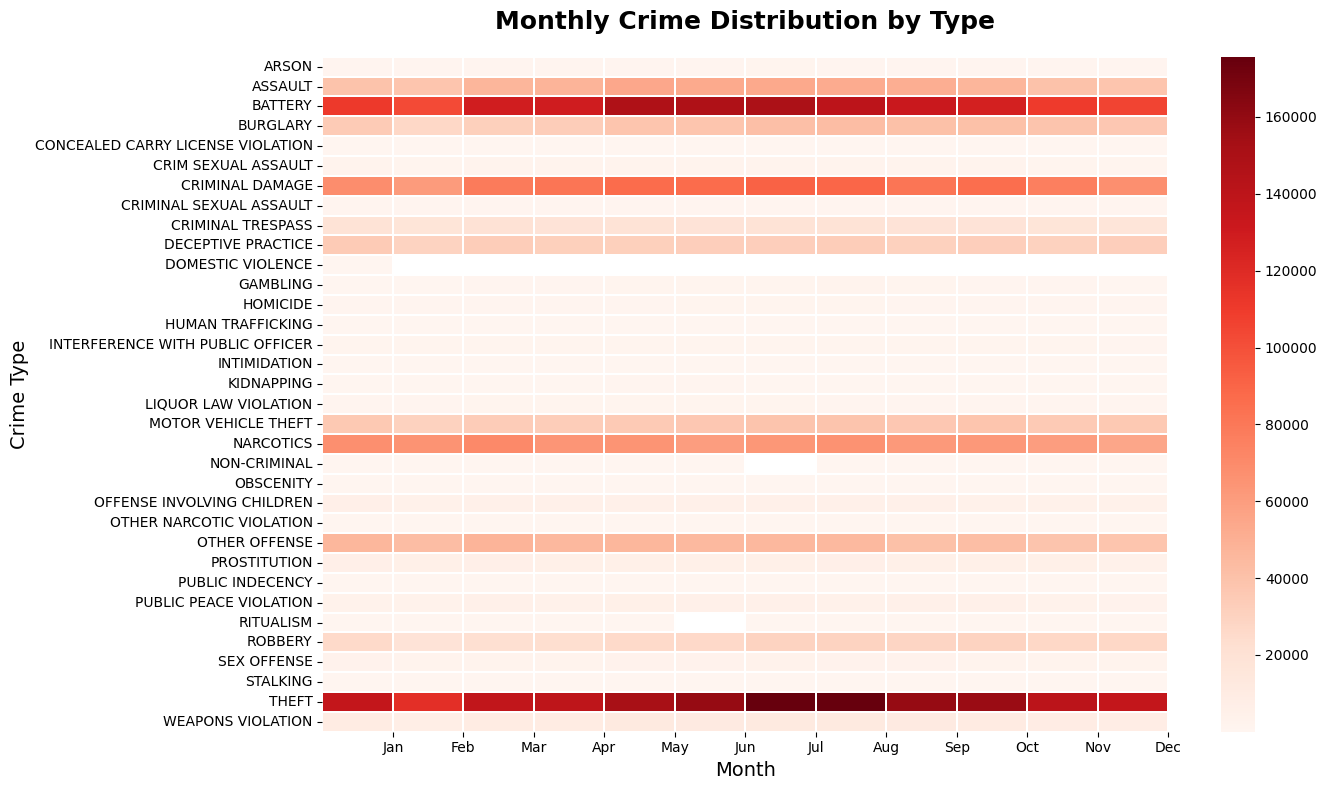

In [174]:
crime_month = data.groupby(['Primary Type', 'Month']).size().unstack(level = 0).T
plt.figure(figsize=(14, 8))
sns.heatmap(crime_month, cmap="Reds", annot=False, linewidths=0.3)
plt.title("Monthly Crime Distribution by Type", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Crime Type", fontsize=14)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()

## 33: Insight
***
narcotics and theft stay on top all year — they’re the biggest players every month. theft really spikes in the summer (july–august), while most other crimes stay kinda steady and lower. what this tells me? if you’re allocating resources, focus heavy on theft and narcotics, especially during peak season, but don’t sleep on smaller categories like weapons or trafficking — they’re not as big now, but they could blow up later.

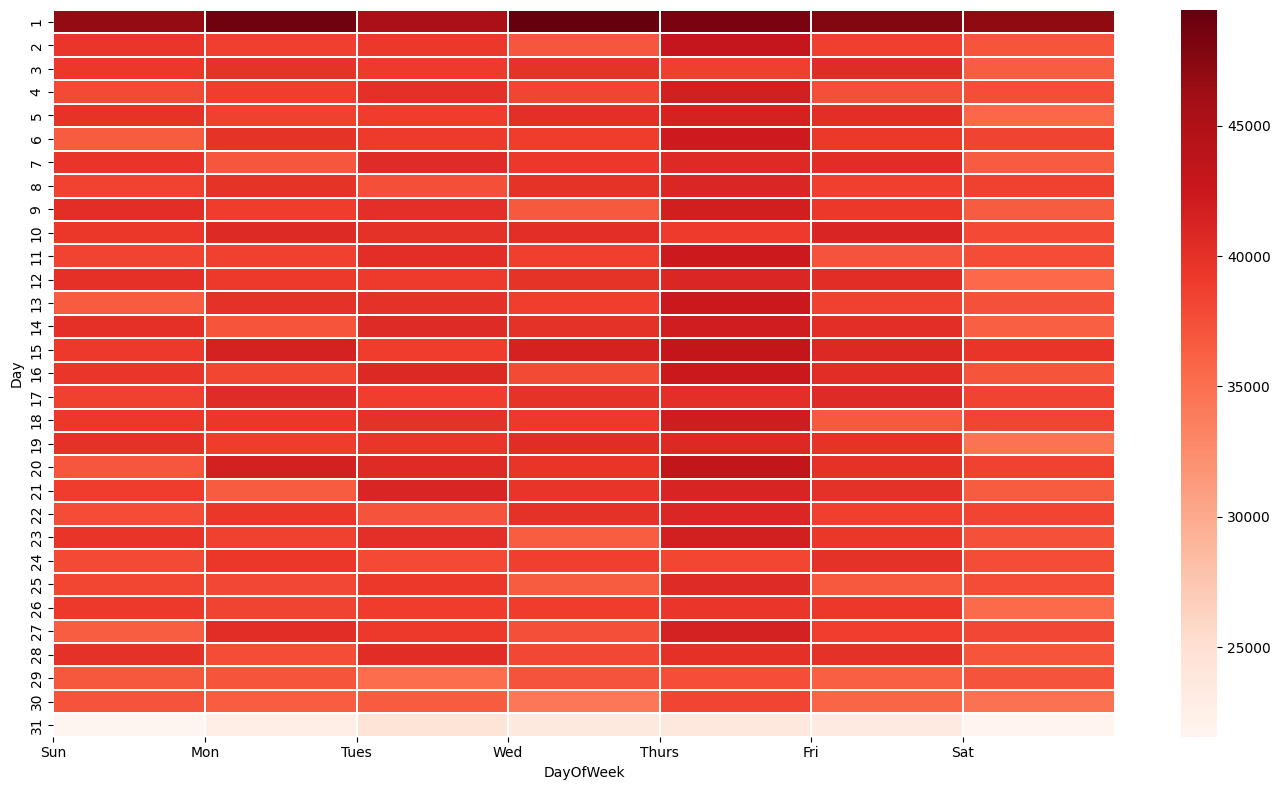

In [205]:
day_distribution = data.groupby(['Day', 'DayOfWeek']).size().unstack(level = 0).T
plt.figure(figsize=(14, 8))
sns.heatmap(day_distribution, cmap="Reds", annot=False, linewidths=0.3)
plt.xticks(range(0, 7), ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri','Sat'])
plt.tight_layout()
plt.show()

## 34: Insight
***
crime really peaks on fridays and saturdays, especially near the end of the month. makes sense — weekends mean more social stuff, nightlife, and just more people out. the heatmap shows the darkest reds around friday–saturday nights in the second half of the month, which basically screams “high-risk window.” if cops or community patrols wanna make a dent, that’s the time to beef up staff, surveillance, and outreach.

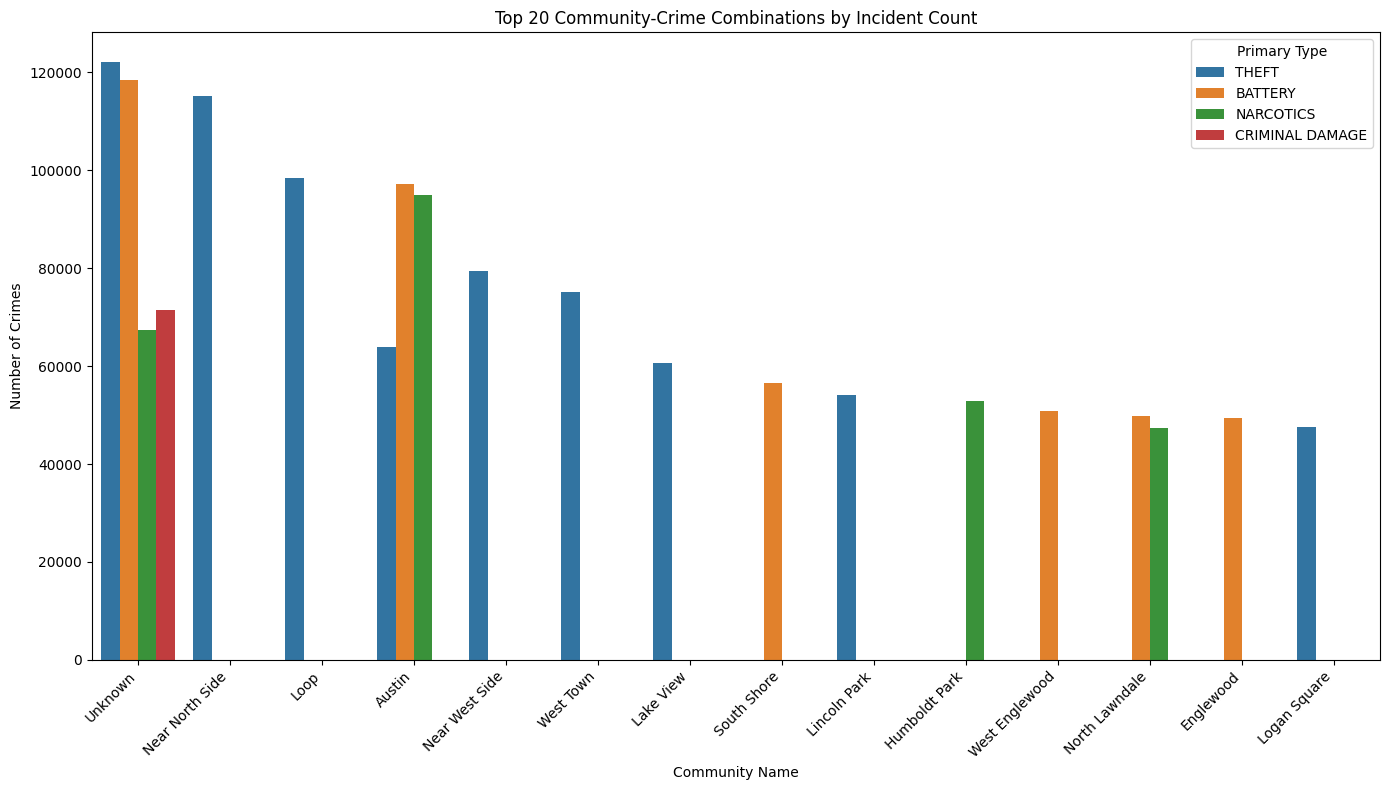

In [228]:
# Group by community and crime type, count number of incidents
community_data = data.groupby(['community_name', 'Primary Type']).size().reset_index(name='crime_count').nlargest(20, 'crime_count')

plt.figure(figsize=(14, 8))
sns.barplot(data=community_data, x='community_name', y='crime_count', hue='Primary Type')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Community-Crime Combinations by Incident Count')
plt.ylabel('Number of Crimes')
plt.xlabel('Community Name')
plt.tight_layout()
plt.show()

## 35: Insight
***
“Unknown” community areas actually dominate the numbers — with over 120,000 thefts logged there. that doesn’t mean crime isn’t happening in real neighborhoods, it just shows big gaps in how locations get recorded. looking at the spots we do know, theft still runs the show in almost every top community. but austin stands out — not just for theft, but also for battery and narcotics. that makes it a layered hotspot, and a clear sign that some neighborhoods need more focused, tailored interventions instead of a one-size-fits-all approach.